**Predicting the Reading Ages of Presidential Speeches Using Former President Donald Trump as a Case Study**

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


## **To install the necessary packages**

In [2]:
!pip install textstat
import textstat

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.1/105.1 kB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 12.8 MB/s eta 0:00:00


In [3]:
# Install vader sentiment package
!pip install vaderSentiment

# Install textblob package
!pip install textblob

# Install WordCloud package
!pip install wordcloud

# Install Contractions package
!pip install contractions

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.8/110.8 kB 12.7 MB/s eta 0:00:00


# **Importing the Necessary Libraries**

In [4]:
import os
import csv
import seaborn as sns
import pandas as pd
import numpy as np
import string
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import unicodedata
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


# **Loading the Dataset**

In [5]:
#To access the file path
folder = "/content/drive/MyDrive/Colab Notebooks/SPEECHES"

In [6]:
# To iterate through files and print their paths
for dirname, _, filenames in os.walk(folder):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/content/drive/MyDrive/Colab Notebooks/SPEECHES/Trump_Detroit_Sep-3-16.txt
/content/drive/MyDrive/Colab Notebooks/SPEECHES/Trump_WarrenMI_Oct-31-16.txt
/content/drive/MyDrive/Colab Notebooks/SPEECHES/Trump_FletcherNC_Oct-21-16.txt
/content/drive/MyDrive/Colab Notebooks/SPEECHES/Trump_GreenBay_Aug-5-16.txt
/content/drive/MyDrive/Colab Notebooks/SPEECHES/Trump_JacksonMS_Aug-24-16.txt
/content/drive/MyDrive/Colab Notebooks/SPEECHES/Trump_Columbus_Oct-13-16.txt
/content/drive/MyDrive/Colab Notebooks/SPEECHES/Trump_PortsmouthNH_Oct-15-16.txt
/content/drive/MyDrive/Colab Notebooks/SPEECHES/Trump_Houston_Sep-17-16.txt
/content/drive/MyDrive/Colab Notebooks/SPEECHES/Trump_WestBendWI_Aug-16-16.txt
/content/drive/MyDrive/Colab Notebooks/SPEECHES/Trump_BaltimoreMD_Sep-12-16.txt
/content/drive/MyDrive/Colab Notebooks/SPEECHES/Trump_Naples_Oct-23-16.txt
/content/drive/MyDrive/Colab Notebooks/SPEECHES/Trump_PensacolaFL_Sep-9-16.txt
/content/drive/MyDrive/Colab Notebooks/SPEECHES/Trump_BedfordNH_Sep-

In [7]:
df_text = []

# To iterate through files and read their content into the list
for dirname, _, filenames in os.walk(folder):
    for filename in filenames:
        if filename.endswith('.txt'):
            file_path = os.path.join(dirname, filename)

            with open(file_path, 'r', encoding='utf-8') as file:
                speech_text = file.read()
                # To append the results to the list as a dictionary
            df_text.append({'Speech': speech_text,})
# To create a DataFrame from the list
df = pd.DataFrame(df_text)

# To save the results as CSV file
df.to_csv("/content/drive/MyDrive/Colab Notebooks/speech_folder.csv", index=False, escapechar='\\')

In [8]:
df.head(2)

Speech
0  Thank you. That's so nice. Thank you.\nWell, t...
1  In 8 days, we are going to win the Great State...

In [9]:
# To create a function to calculate the readability scores for the speech
def calculate_readability_scores(text):
    gunning_fog_score = textstat.gunning_fog(text)
    ari_score = textstat.automated_readability_index(text)
    flesch_reading_ease_score = textstat.flesch_reading_ease(text)
    flesch_kincaid_grade = textstat.flesch_kincaid_grade(text)
    return gunning_fog_score, ari_score, flesch_reading_ease_score, flesch_kincaid_grade

# To apply the function to your DataFrame to calculate the scores for each speech
df['Gunning Fog Index'], df['Automated Readability Index'], df['Flesch Reading Ease'], df['Flesch-Kincaid Grade Level'] = zip(*df['Speech'].apply(lambda x: ' '.join(x)).apply(calculate_readability_scores))


In [10]:
df.head()

Speech  Gunning Fog Index  \
0  Thank you. That's so nice. Thank you.\nWell, t...              17.44   
1  In 8 days, we are going to win the Great State...              29.12   
2  Thank you.\nIn 18 days, we are going to win th...              30.08   
3  So how good is he? How good is he? \nSpecial. ...              19.32   
4  Thank you, everybody. Thank you. Thank you ver...              25.76   

   Automated Readability Index  Flesch Reading Ease  \
0                          5.3                77.98   
1                         19.8                48.34   
2                         21.0                45.91   
3                          7.7                73.21   
4                         15.7                56.87   

   Flesch-Kincaid Grade Level  
0                        13.2  
1                        24.6  
2                        25.5  
3                        15.0  
4                        21.3

**To show the unique scores of each speech according to readability formular**

In [11]:
df['Flesch-Kincaid Grade Level'].unique()

array([13.2, 24.6, 25.5, 15. , 21.3, 32. , 24.9, 27.7, 24.4, 26.3, 29.5,
       24. , 23.2, 23.1, 28.6, 14.2, 27.8, 13.1, 29. , 22.3, 29.7, 29.8,
       18.9, 18.8, 17.1, 18.2, 24.8, 32.9, 12.8, 28.9, 27.3, 25.3, 43.4,
       14.9, 28.2, 31. , 26.4, 24.2, 14.6, 28.5, 28. , 23. , 17.6, 26.2,
       16.2, 23.8, 21.9, 33.7,  9. , 23.7, 25.8, 17. , 21.6, 12.1, 10.1,
       11.2, 11.5, 14.8, 12.4, 11.1, 14.7, 10.7,  9.1, 14.3, 12.2, 12. ,
       13.7, 14.4, 11.9, 12.5, 14. , 12.7, 10.8, 10.4, 12.6, 12.3, 14.5,
       15.7, 18. , 16.5, 25.4])

In [12]:
df['Flesch Reading Ease'].unique()

array([77.98, 48.34, 45.91, 73.21, 56.87, 29.06, 47.53, 40.32, 48.85,
       43.88, 35.66, 49.87, 52.  , 52.3 , 37.99, 75.34, 46.01, 40.02,
       78.39, 36.98, 54.23, 35.15, 34.84, 63.26, 63.37, 67.93, 65.09,
       43.98, 47.94, 26.72, 79.  , 37.28, 41.24, 46.41, -0.59, 73.62,
       39.11, 31.8 , 35.55, 39.92, 43.78, 41.34, 49.46, 74.33, 38.09,
       39.51, 52.4 , 66.51, 44.18, 70.17, 50.37, 55.35, 49.97, 24.69,
       48.95, 34.95, 89.04, 50.58, 45.2 , 68.24, 74.43, 56.06, 80.92,
       86.2 , 83.26, 82.55, 73.92, 80.11, 83.36, 74.02, 84.48, 88.64,
       75.04, 80.01, 66.61, 80.72, 81.23, 76.66, 74.83, 81.33, 79.91,
       75.95, 80.82, 79.2 , 84.17, 85.39, 79.61, 80.42, 79.81, 74.73,
       82.35, 71.49, 80.62, 65.5 , 69.56, 46.31])

In [13]:
df['Gunning Fog Index'].unique()

array([17.44, 29.12, 30.08, 19.32, 25.76, 36.72, 29.44, 32.28, 28.92,
       30.88, 34.12, 28.52, 27.68, 27.56, 33.2 , 18.48, 30.04, 32.4 ,
       17.28, 33.6 , 26.8 , 34.32, 34.44, 23.24, 23.2 , 21.4 , 22.52,
       30.84, 29.28, 37.64, 17.04, 33.48, 31.92, 29.88, 48.4 , 19.16,
       32.76, 35.64, 34.16, 32.44, 30.92, 31.88, 28.68, 18.88, 33.16,
       32.6 , 27.52, 21.96, 30.76, 20.52, 28.32, 26.36, 28.48, 38.44,
       28.88, 34.4 , 13.08, 28.24, 30.36, 21.28, 18.84, 26.08, 16.28,
       14.2 , 15.36, 15.64, 19.04, 16.6 , 15.32, 19.  , 14.88, 13.24,
       18.6 , 16.64, 21.92, 16.36, 16.16, 17.96, 18.68, 16.12, 16.68,
       18.24, 16.32, 16.96, 15.  , 14.52, 16.8 , 16.48, 16.72, 18.72,
       15.72, 20.  , 16.4 , 22.36, 20.76, 29.92])

In [14]:
df['Automated Readability Index'].unique()

array([ 5.3, 19.8, 21. ,  7.7, 15.7, 29.3, 20.2, 23.8, 19.6, 22. , 26.1,
       19.1, 18. , 17.9, 24.9,  6.7, 23.9,  5.2, 25.4, 16.9, 26.3, 26.5,
       12.5, 10.3, 11.6, 20.1, 30.4,  4.9, 25.3, 23.3, 20.8, 43.9,  7.5,
       24.4, 27.9, 26.2, 24. , 22.1, 19.3, 19.5,  7.1, 24.2, 17.8, 10.9,
       21.9,  9.2, 18.8, 16.4, 19. , 31.5, 26.4, -0.2, 21.4, 10.1, 16. ,
        3.9,  1.4,  2.8,  3.1,  7.3,  4.3,  2.7,  7.2,  2.2,  0.2,  6.8,
        4.4, 11. ,  4. ,  3.8,  6. ,  6.9,  3.7,  6.4,  4.8,  2.3,  1.7,
        4.6,  4.2,  4.5,  3.3,  8.6, 11.4,  9.5])

### **Exploratory data analysis**

In [15]:
#To create a wordclound for the speeches

def create_wordcloud(data, value):
    # To concatenate the text from the specified column
    text = " ".join(df['Speech'])

    # To create the WordCloud
    wordcloud = WordCloud(stopwords=STOPWORDS, background_color='black', width=3000, height=2500).generate(text)

    # To display the WordCloud
    plt.figure(1, figsize=(12, 12))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

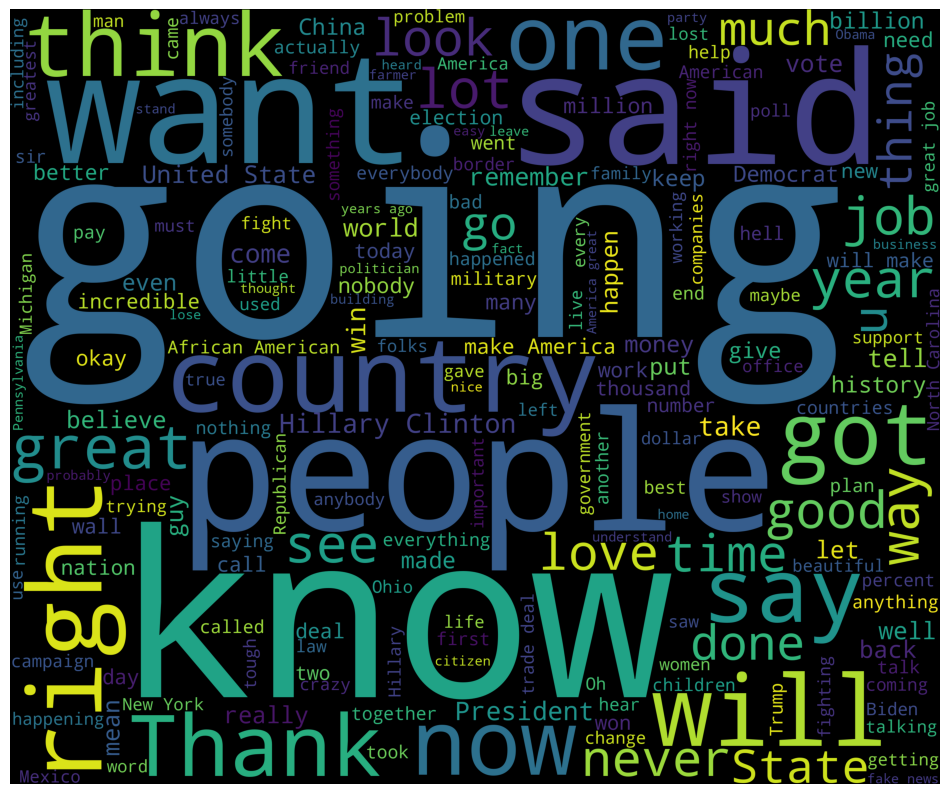

In [16]:
create_wordcloud(df, 'Speech')

The wordclound above shows that these words(going, people, know, Thank, want,country,right,will) are commonly used in President Donald Trump speeches.

# **Data Pre-processing and Cleaning**

### **To Fix Contractions**

In [17]:
import contractions

#To fix the conractions in the data

def replace_contractions(text):
  return contractions.fix(text)

df['Speech'] = df['Speech'].apply(lambda x: replace_contractions(x))

### **To Remove Special Characters**

In [18]:
#To remove the special characters from the data
import re
def remove_special_chars(text):
  text = re.sub('[^a-zA-Z]', " ", text)
  return text
df['Speech'] = df['Speech'].apply(lambda x: replace_contractions(x))

In [19]:
df.head(2)

Speech  Gunning Fog Index  \
0  Thank you. That is so nice. Thank you.\nWell, ...              17.44   
1  In 8 days, we are going to win the Great State...              29.12   

   Automated Readability Index  Flesch Reading Ease  \
0                          5.3                77.98   
1                         19.8                48.34   

   Flesch-Kincaid Grade Level  
0                        13.2  
1                        24.6

### **Tokenization**

In [20]:
#To tokenize the text
df['Speech'] = df.apply(lambda row: nltk.word_tokenize(row['Speech']), axis = 1)

In [21]:
df.head(2)

Speech  Gunning Fog Index  \
0  [Thank, you, ., That, is, so, nice, ., Thank, ...              17.44   
1  [In, 8, days, ,, we, are, going, to, win, the,...              29.12   

   Automated Readability Index  Flesch Reading Ease  \
0                          5.3                77.98   
1                         19.8                48.34   

   Flesch-Kincaid Grade Level  
0                        13.2  
1                        24.6

 **Remove Non-Ascii Character**

In [22]:
#To remove the Non-Ascii Character
def remove_non_ascii(row):
  new_row = []
  for word in row:
    new_word = unicodedata.normalize('NFKD', word ).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    new_row.append(new_word)
  return new_row

df['Speech'] = df['Speech'].apply(lambda x: remove_non_ascii(x))
df.head(2)

Speech  Gunning Fog Index  \
0  [Thank, you, ., That, is, so, nice, ., Thank, ...              17.44   
1  [In, 8, days, ,, we, are, going, to, win, the,...              29.12   

   Automated Readability Index  Flesch Reading Ease  \
0                          5.3                77.98   
1                         19.8                48.34   

   Flesch-Kincaid Grade Level  
0                        13.2  
1                        24.6

**Remove punctuation**

In [23]:
#To remove the punctuation
def remove_punctuation(row):
  tokens = [word for word in row if word not in string.punctuation]
  return tokens

df['Speech'] = df['Speech'].apply(lambda x: remove_punctuation(x))

In [24]:
df.head(2)

Speech  Gunning Fog Index  \
0  [Thank, you, That, is, so, nice, Thank, you, W...              17.44   
1  [In, 8, days, we, are, going, to, win, the, Gr...              29.12   

   Automated Readability Index  Flesch Reading Ease  \
0                          5.3                77.98   
1                         19.8                48.34   

   Flesch-Kincaid Grade Level  
0                        13.2  
1                        24.6

### **To Lowercase the Speech**

In [25]:
#To lowercase the speech
def to_lowercase(row):
  words = [word.lower() for word in row]
  return words

df['Speech'] = df['Speech'].apply(lambda x: to_lowercase(x))

In [26]:
df.head(2)

Speech  Gunning Fog Index  \
0  [thank, you, that, is, so, nice, thank, you, w...              17.44   
1  [in, 8, days, we, are, going, to, win, the, gr...              29.12   

   Automated Readability Index  Flesch Reading Ease  \
0                          5.3                77.98   
1                         19.8                48.34   

   Flesch-Kincaid Grade Level  
0                        13.2  
1                        24.6

**Remove Stopwords**

In [27]:
from nltk.corpus import stopwords
#To remove the stopwords
stop_words = stopwords.words('english')

def remove_stopwords(row):
  words = [word for word in row if word not in stop_words]
  return words

df['Speech'] = df['Speech'].apply(lambda x: remove_punctuation(x))

In [28]:
df.head(2)

Speech  Gunning Fog Index  \
0  [thank, you, that, is, so, nice, thank, you, w...              17.44   
1  [in, 8, days, we, are, going, to, win, the, gr...              29.12   

   Automated Readability Index  Flesch Reading Ease  \
0                          5.3                77.98   
1                         19.8                48.34   

   Flesch-Kincaid Grade Level  
0                        13.2  
1                        24.6

**Lemmitazation**

In [29]:
#To perform lemmitazation on the speech
from nltk.stem import PorterStemmer, WordNetLemmatizer
lm = WordNetLemmatizer()

def lemmatize_words(row):
  words = [lm.lemmatize(word) for word in row]
  return words

df['Speech'] = df['Speech'].apply(lambda x: lemmatize_words(x))

In [30]:
df.head(2)

Speech  Gunning Fog Index  \
0  [thank, you, that, is, so, nice, thank, you, w...              17.44   
1  [in, 8, day, we, are, going, to, win, the, gre...              29.12   

   Automated Readability Index  Flesch Reading Ease  \
0                          5.3                77.98   
1                         19.8                48.34   

   Flesch-Kincaid Grade Level  
0                        13.2  
1                        24.6

In [31]:
#saving the clean text
def join_words(row):
  words = " ".join([word for word in row])
  words = re.sub('[^a-zA-Z]', ' ', words)
  return words
df['Speech'] = df['Speech'].apply(lambda x: join_words(x))

df.head(2)

Speech  Gunning Fog Index  \
0  thank you that is so nice thank you well that ...              17.44   
1  in   day we are going to win the great state o...              29.12   

   Automated Readability Index  Flesch Reading Ease  \
0                          5.3                77.98   
1                         19.8                48.34   

   Flesch-Kincaid Grade Level  
0                        13.2  
1                        24.6

### **To save the Clean Speech**

In [32]:
# To save the results as CSV file
df.to_csv("/content/drive/MyDrive/Colab Notebooks/new_clean_speech_folder2.csv", index=False)

In [33]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/new_clean_speech_folder2.csv')
df.head(4)

Speech  Gunning Fog Index  \
0  thank you that is so nice thank you well that ...              17.44   
1  in   day we are going to win the great state o...              29.12   
2  thank you in    day we are going to win the st...              30.08   
3  so how good is he how good is he special speci...              19.32   

   Automated Readability Index  Flesch Reading Ease  \
0                          5.3                77.98   
1                         19.8                48.34   
2                         21.0                45.91   
3                          7.7                73.21   

   Flesch-Kincaid Grade Level  
0                        13.2  
1                        24.6  
2                        25.5  
3                        15.0

### **Flesch Reading Ease Score**

In [34]:
#To create a copy of Flesch reading ease score of the speech
data_flesch = df.copy()
data_flesch = data_flesch.drop(['Flesch-Kincaid Grade Level','Gunning Fog Index','Automated Readability Index'], axis = 1)
data_flesch.head()

Speech  Flesch Reading Ease
0  thank you that is so nice thank you well that ...                77.98
1  in   day we are going to win the great state o...                48.34
2  thank you in    day we are going to win the st...                45.91
3  so how good is he how good is he special speci...                73.21
4  thank you everybody thank you thank you very m...                56.87

In [35]:
# To create a function to categorize the Flesch Reading Ease scores
def Score_level(flesch_score):
    if flesch_score >= 90:
        return 'Very Easy'
    elif flesch_score >= 80:
        return 'Easy'
    elif flesch_score >= 70:
        return 'Fairly Easy'
    elif flesch_score >= 60:
        return 'Standard'
    elif flesch_score >= 50:
        return 'Fairly Difficult'
    elif flesch_score >= 30:
        return 'Difficult'
    else:
        return 'Very Confusing'


data_flesch['Score_level'] = data_flesch['Flesch Reading Ease'].apply(Score_level)

In [36]:
data_flesch.head()

Speech  Flesch Reading Ease  \
0  thank you that is so nice thank you well that ...                77.98   
1  in   day we are going to win the great state o...                48.34   
2  thank you in    day we are going to win the st...                45.91   
3  so how good is he how good is he special speci...                73.21   
4  thank you everybody thank you thank you very m...                56.87   

        Score_level  
0       Fairly Easy  
1         Difficult  
2         Difficult  
3       Fairly Easy  
4  Fairly Difficult

### **To Encode the Score Level**

In [37]:
# To define a dictionary for difficulty levels
Encoded = {'Very Easy': 7,'Easy': 6,'Fairly Easy': 5,'Standard': 4,'Fairly Difficult': 3,'Difficult': 2,'Very Confusing': 1}

# To create a new column with the encoded numerical values
data_flesch['Encoded'] = data_flesch['Score_level'].map(Encoded)

In [38]:
data_flesch.head()

Speech  Flesch Reading Ease  \
0  thank you that is so nice thank you well that ...                77.98   
1  in   day we are going to win the great state o...                48.34   
2  thank you in    day we are going to win the st...                45.91   
3  so how good is he how good is he special speci...                73.21   
4  thank you everybody thank you thank you very m...                56.87   

        Score_level  Encoded  
0       Fairly Easy        5  
1         Difficult        2  
2         Difficult        2  
3       Fairly Easy        5  
4  Fairly Difficult        3

To define the thresholds for age groups based on the Flesch Reading Ease scores:

Children: Flesch Reading Ease score between 90 and 100
Teenagers: Flesch Reading Ease score between 60 aand 90
Adults: Flesch Reading Ease score between the score of 0 and 60

Adults is 18+
Teenager is 12 - 17
Children is 7 - 11

In [39]:
#To apply age tag to the scores
def categorize_age_range(flesch_score):
    if 90 <= flesch_score <= 100:
        return 'Children'
    elif 60 <= flesch_score < 90:
        return 'Teenagers'
    else:
        return 'Adults'

# Apply the categorization function to create a new column
data_flesch['AgeRange'] = data_flesch['Flesch Reading Ease'].apply(categorize_age_range)

In [40]:
data_flesch.head()

Speech  Flesch Reading Ease  \
0  thank you that is so nice thank you well that ...                77.98   
1  in   day we are going to win the great state o...                48.34   
2  thank you in    day we are going to win the st...                45.91   
3  so how good is he how good is he special speci...                73.21   
4  thank you everybody thank you thank you very m...                56.87   

        Score_level  Encoded   AgeRange  
0       Fairly Easy        5  Teenagers  
1         Difficult        2     Adults  
2         Difficult        2     Adults  
3       Fairly Easy        5  Teenagers  
4  Fairly Difficult        3     Adults

In [41]:
#To check the unique agetag
data_flesch['AgeRange'].unique()

array(['Teenagers', 'Adults'], dtype=object)

In [42]:
#To check the unique values of the data
data_flesch['Score_level'].unique()

array(['Fairly Easy', 'Difficult', 'Fairly Difficult', 'Very Confusing',
       'Standard', 'Easy'], dtype=object)

In [43]:
#To check the unique values of the data
data_flesch['Encoded'].unique()

array([5, 2, 3, 1, 4, 6])

### **Exploratory data analysis**

**To show the bar plot of the encoded level**

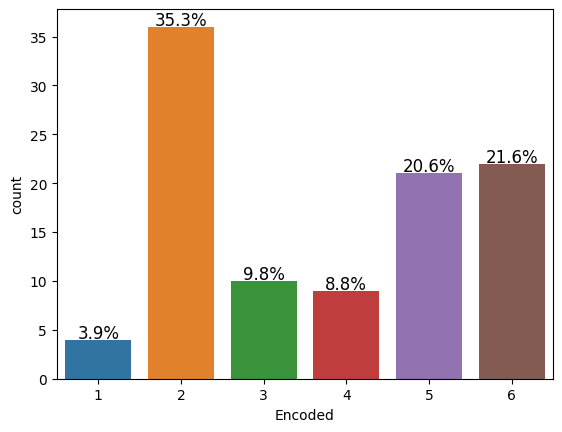

In [44]:

#To plot the disribution of the class label
def bar_plot(data, feature):
  #To create the countplot
  plot = sns.countplot(x = feature, data = data_flesch)

  #To the length of the data
  total = len(data)


  for p in plot.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height() / total)
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        plot.annotate(percentage, (x, y), ha='center', va='center', size=12, xytext=(0, 5), textcoords='offset points')

plt.show()
bar_plot(data_flesch, 'Encoded')

**To show the Bar plot of the Age range**

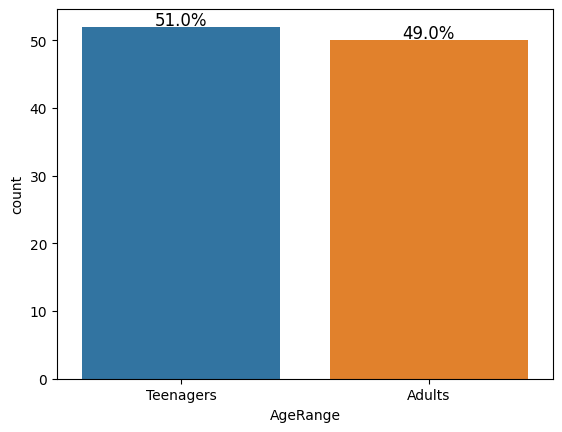

In [45]:
#To plot the disribution of the class label
def bar_plot(data, feature):
  #To create the countplot
  plot = sns.countplot(x = feature, data = data_flesch)

  #To the length of the data
  total = len(data)


  for p in plot.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height() / total)
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        plot.annotate(percentage, (x, y), ha='center', va='center', size=12, xytext=(0, 5), textcoords='offset points')

plt.show()
bar_plot(data_flesch, 'AgeRange')

**To show word cloud for the Teenagers and Adults**

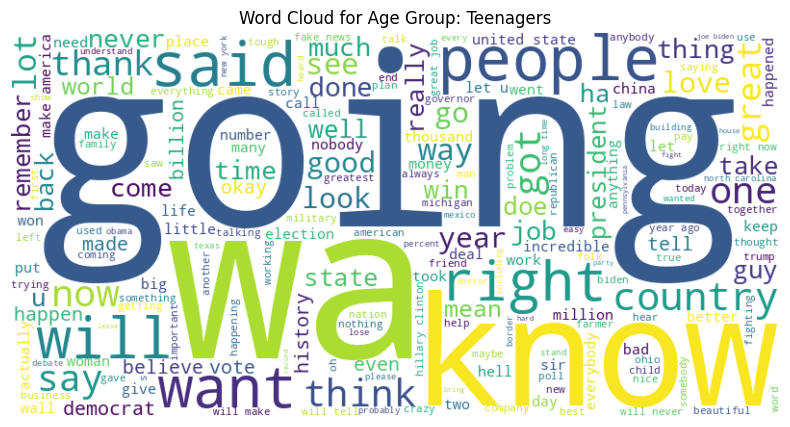

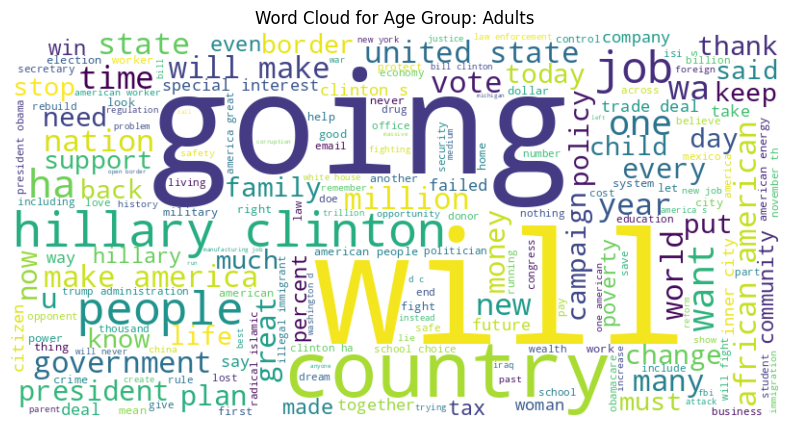

In [46]:
# To create a function to generate word clouds
def generate_word_cloud(age_group):
    # To filter the data for the specified age group
    age_group_data = data_flesch[data_flesch['AgeRange'] == age_group]

    # To combine all text in the age group into a single string
    text = ' '.join(age_group_data['Speech'])

    # To generate the word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

    # To display the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for Age Group: {age_group}')
    plt.axis('off')
    plt.show()

# To get unique age groups
age_groups = data_flesch['AgeRange'].unique()

# To generate word clouds for each age group
for age_group in age_groups:
    generate_word_cloud(age_group)

**To show the Box Plot of the Readabilty Age**

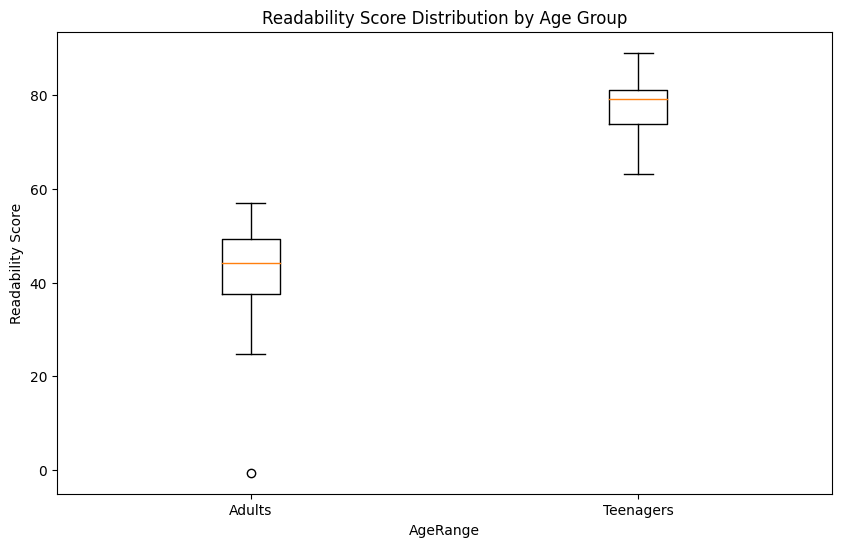

In [47]:
# To create a dictionary to store the data frames
data_frames = {}

# To group the data by 'AgeTag' and store each group's data frame in the dictionary
grouped_data = data_flesch.groupby('AgeRange')
for name, group in grouped_data:
    data_frames[name] = group['Flesch Reading Ease'].values

# To create a list of data to plot
data_to_plot = [data for data in data_frames.values()]

# To create a box plot for each age group
plt.figure(figsize=(10, 6))
plt.boxplot(data_to_plot, labels=data_frames.keys())
plt.title('Readability Score Distribution by Age Group')
plt.xlabel('AgeRange')
plt.ylabel('Readability Score')
plt.show()

### **Applying the Term frequency- Inverse Document Frequency**

In [48]:
#using TfidfVectorizer to convert text data to numbers
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features = 20000)
#To transform the text with TF-IDF
data_tfidf = tfidf.fit_transform(data_flesch['Speech'])

#Feature shape
data_tfidf = data_tfidf.toarray()

**Selecting the target and features**

In [49]:
from sklearn.model_selection import train_test_split
#To select the features and target
X = data_tfidf
y = data_flesch.AgeRange

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)

### **To Apply Random Forest Model**

In [51]:
from sklearn.ensemble import RandomForestClassifier
#To train the model
rf = RandomForestClassifier(random_state = 0, n_jobs = -1)

rf.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1, random_state=0)

In [52]:
from sklearn.metrics._plot.confusion_matrix import confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix
# To create a function to print the classification report and get confusion matrix
def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))
    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(8, 5))
    sns.heatmap(cm, annot=True, fmt='.2f', xticklabels=['Teenagers', 'Adults'], yticklabels=['Teenagers', 'Adults'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

              precision    recall  f1-score   support

      Adults       0.93      0.82      0.87        17
   Teenagers       0.81      0.93      0.87        14

    accuracy                           0.87        31
   macro avg       0.87      0.88      0.87        31
weighted avg       0.88      0.87      0.87        31



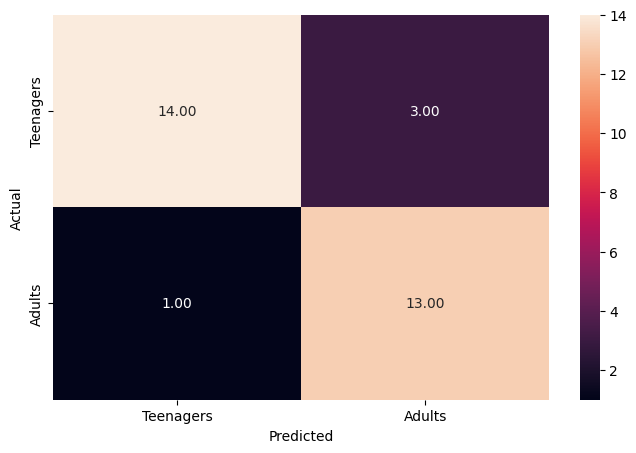

In [53]:
#make predictions
y_rf = rf.predict(X_test)


#check the metrics
metrics_score(y_rf, y_test)

**To apply another model Decision Tree**

In [54]:
from sklearn.tree import DecisionTreeClassifier

# To create a Decision Tree classifier
dt = DecisionTreeClassifier(random_state=0,)

# Train the model
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

              precision    recall  f1-score   support

      Adults       0.93      0.88      0.90        16
   Teenagers       0.88      0.93      0.90        15

    accuracy                           0.90        31
   macro avg       0.90      0.90      0.90        31
weighted avg       0.91      0.90      0.90        31



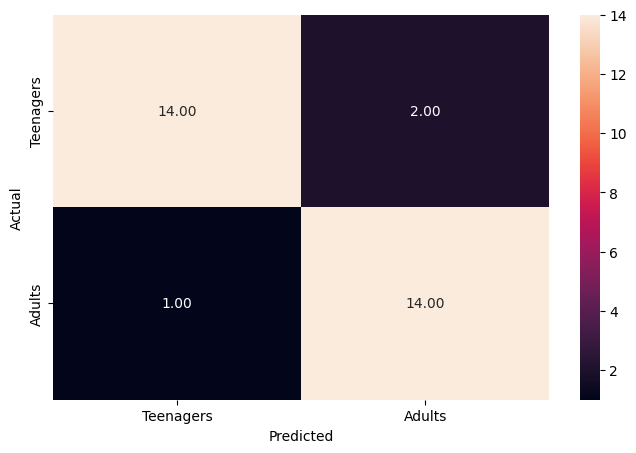

In [55]:
y_dt = dt.predict(X_test)


#check the metrics
metrics_score(y_dt, y_test)

In [56]:
from sklearn.ensemble import GradientBoostingClassifier

# To create a Decision Tree classifier
gb = GradientBoostingClassifier(random_state=0,)

# Train the model
gb.fit(X_train, y_train)

GradientBoostingClassifier(random_state=0)

              precision    recall  f1-score   support

      Adults       0.93      0.88      0.90        16
   Teenagers       0.88      0.93      0.90        15

    accuracy                           0.90        31
   macro avg       0.90      0.90      0.90        31
weighted avg       0.91      0.90      0.90        31



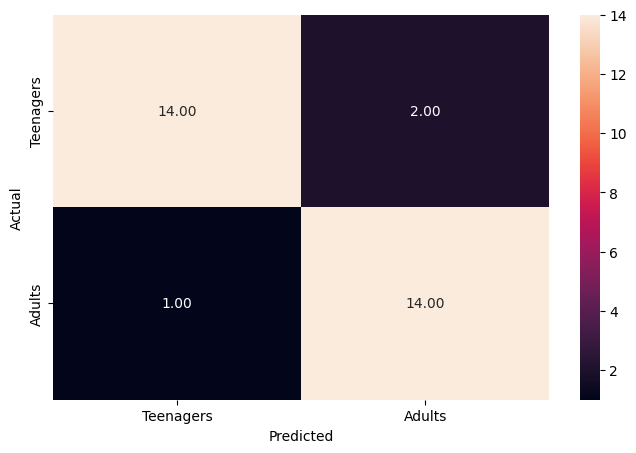

In [57]:
y_gb = gb.predict(X_test)


#check the metrics
metrics_score(y_gb, y_test)

In [58]:
#pip install pydotplus
#import pydotplus
#from IPython.display import Image
#from sklearn.tree import plot_tree
#from sklearn.tree import export_graphviz
#from sklearn import tree

### **To check the Feature Importance of the model**

In [59]:
def get_top40_words(model, all_features):
    top_features = " "
    feat = model.feature_importances_

    features = np.argsort(feat)[::-1]

    for i in features[0:80]:
        top_features += all_features[i]
        top_features += ","

    # To create the WordCloud
    wordcloud = WordCloud(stopwords=STOPWORDS, background_color='black', width=3000, height=2500).generate(top_features)

    # To display the WordCloud
    plt.figure(1, figsize=(9, 8), frameon=False)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

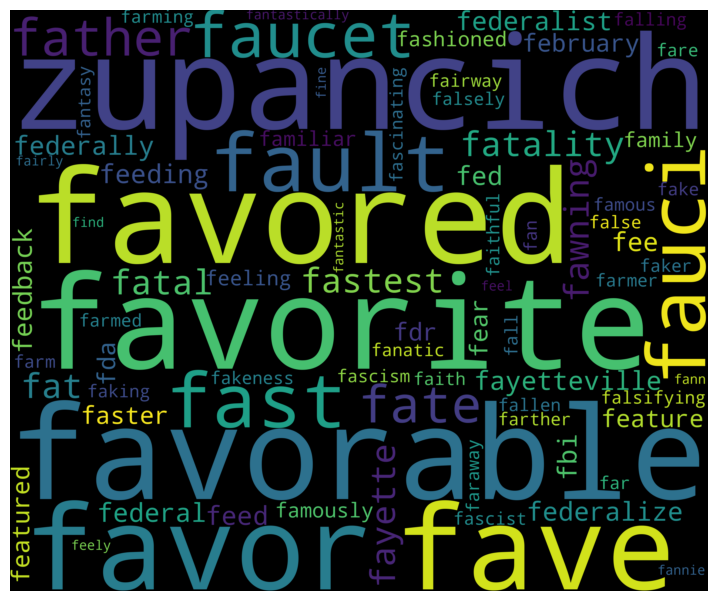

In [60]:
feature_names = tfidf.get_feature_names_out()

get_top40_words(gb,feature_names)

**For Cross Validation**

In [61]:
#To implement the standard Kfold
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score


#To create an instance of the Kfold
kfold = KFold(n_splits=5, shuffle=True, random_state=0)


#To create an instance of the model
dt = DecisionTreeClassifier(random_state=0,)

#scores = cross_val_score(estimator=gb, X=X_train, y=y_train, cv=kfold, scoring='recall')

# Define the scoring metric as accuracy
#scoring = make_scorer(accuracy_score)

# Perform cross-validation using accuracy as the scoring metric
scores = cross_val_score(estimator=dt, X=X_train, y=y_train, cv=kfold, scoring='accuracy')

# Print the scores
print(scores)

[1.         1.         0.85714286 0.85714286 1.        ]


### **To Apply the Wordvec**

In [62]:
#Import the word2vec from gensim models

from gensim.models import Word2Vec

#Get the list of the data
word_list = [sent.split() for sent in data_flesch["Speech"]]

In [63]:
len(word_list)

102

In [64]:
#create wordvec model
model_flesch = Word2Vec(word_list, sg = 1)

In [65]:
#get the vocabulary of the data
vocab = model_flesch.wv.key_to_index

In [66]:
len(vocab)

4208

In [67]:
#Top word similar to politics
model_flesch.wv.similar_by_word('politics')

[('phenomenon', 0.7589329481124878),
 ('course', 0.7362997531890869),
 ('assembled', 0.7321640253067017),
 ('temperament', 0.7282794117927551),
 ('craziest', 0.7265855073928833),
 ('political', 0.7262697219848633),
 ('heed', 0.7256766557693481),
 ('proof', 0.7242426872253418),
 ('certainly', 0.7220577001571655),
 ('position', 0.72008216381073)]

In [68]:
#Top word similar to government
model_flesch.wv.similar_by_word('government')

[('bureaucracy', 0.6670459508895874),
 ('rule', 0.6517261862754822),
 ('honesty', 0.6447497606277466),
 ('serve', 0.6439245939254761),
 ('benefit', 0.6388482451438904),
 ('public', 0.6328175663948059),
 ('ethic', 0.6154212355613708),
 ('takeover', 0.6112106442451477),
 ('personal', 0.6052079200744629),
 ('student', 0.605161726474762)]

In [69]:
#Top word similar to president
model_flesch.wv.similar_by_word('president')

[('vice', 0.6656815409660339),
 ('barack', 0.6654524207115173),
 ('hussein', 0.6563106179237366),
 ('elected', 0.6242422461509705),
 ('bush', 0.6213462948799133),
 ('campaigning', 0.6173996329307556),
 ('apologized', 0.6131615042686462),
 ('nominate', 0.600925087928772),
 ('apologize', 0.6007513403892517),
 ('prepared', 0.5952466726303101)]

In [70]:
import numpy as np
#To create a vector representation of the text data Word2Vec model
def get_embeddings(model_flesch, words, vocab):
  embeddings =[]
  for word in words:
    if word in vocab:
      embeddings.append(model_flesch.wv[word])
    if len(embeddings) == 0:
      return np.zeros(model_flesch.vector_size)
    else:
      return np.mean(embeddings, axis = 0)

def word_vectoriser(model_flesch, corpus):
  #To get unique words in the vocabulary
  vocab = set(model_flesch.wv.key_to_index)
  features = [get_embeddings(model_flesch, tokenized_sentence, vocab) for tokenized_sentence in corpus]
  return np.array(features)

In [71]:
feature_array = word_vectoriser(model_flesch=model_flesch, corpus=word_list)

In [72]:
pd.DataFrame(feature_array)

0         1         2         3         4         5         6   \
0    0.271028  0.651232 -0.773626  0.345503  0.856274 -0.283599  0.244651   
1   -0.291632  0.358088 -0.202211 -0.182560 -0.098207 -0.426739 -0.106358   
2    0.271028  0.651232 -0.773626  0.345503  0.856274 -0.283599  0.244651   
3   -0.324811 -0.014709  0.012393  0.029720  0.555200 -0.210442  0.087367   
4    0.271028  0.651232 -0.773626  0.345503  0.856274 -0.283599  0.244651   
..        ...       ...       ...       ...       ...       ...       ...   
97   0.271028  0.651232 -0.773626  0.345503  0.856274 -0.283599  0.244651   
98   0.271028  0.651232 -0.773626  0.345503  0.856274 -0.283599  0.244651   
99  -0.047993 -0.039805  0.123973  0.092505  0.067645 -0.357729 -0.001122   
100  0.271028  0.651232 -0.773626  0.345503  0.856274 -0.283599  0.244651   
101 -0.086635 -0.092079 -0.214675  0.304146  0.064677 -0.277507 -0.071607   

           7         8         9   ...        90        91        92  \
0    0.729318  0.356229  0.070652  ...  0.144038  0.354050 -0.221781   
1    0.356161 -0.087553 -0.525387  ...  0.700490 -0.058144  0.046719   
2    0.729318  0.356229  0.070652  ...  0.144038  0.354050 -0.221781   
3    0.162637 -0.602076 -0.197658  ...  0.277573  0.227015 -0.072685   
4    0.729318  0.356229  0.070652  ...  0.144038  0.354050 -0.221781   
..        ...       ...       ...  ...       ...       ...       ...   
97   0.729318  0.356229  0.070652  ...  0.144038  0.354050 -0.221781   
98   0.729318  0.356229  0.070652  ...  0.144038  0.354050 -0.221781   
99   0.512998 -0.317120 -0.146978  ...  0.198226 -0.106947 -0.027030   
100  0.729318  0.356229  0.070652  ...  0.144038  0.354050 -0.221781   
101  0.143315 -0.015817  0.175646  ... -0.047415  0.094546 -0.134243   

           93        94        95        96        97        98        99  
0    0.102581 -0.151054 -0.260548  0.200588  0.445332  0.147724  0.352502  
1    0.126726 -0.011367 -0.055036  0.168229 -0.284251 -0.024430  0.175555  
2    0.102581 -0.151054 -0.260548  0.200588  0.445332  0.147724  0.352502  
3    0.017778 -0.161714 -0.080485  0.233750 -0.079773 -0.045212 -0.292084  
4    0.102581 -0.151054 -0.260548  0.200588  0.445332  0.147724  0.352502  
..        ...       ...       ...       ...       ...       ...       ...  
97   0.102581 -0.151054 -0.260548  0.200588  0.445332  0.147724  0.352502  
98   0.102581 -0.151054 -0.260548  0.200588  0.445332  0.147724  0.352502  
99   0.027884  0.074643 -0.073499 -0.489403 -0.253803  0.047094 -0.012500  
100  0.102581 -0.151054 -0.260548  0.200588  0.445332  0.147724  0.352502  
101 -0.077154  0.130357  0.310310  0.009680 -0.215886  0.052313  0.138740  

[102 rows x 100 columns]

In [73]:
#selecting the features and target
X_fv= feature_array
y_fv = data_flesch.AgeRange

In [74]:
X_train_fv, X_test_fv, y_train_fv, y_test_fv = train_test_split(X_fv, y_fv, test_size=0.2, random_state=0, stratify=y)

In [75]:
from sklearn.ensemble import RandomForestClassifier
#To train the model
rf_fv = RandomForestClassifier(random_state = 0, n_jobs = -1)

rf_fv.fit(X_train_fv, y_train_fv)

RandomForestClassifier(n_jobs=-1, random_state=0)

              precision    recall  f1-score   support

      Adults       0.70      0.50      0.58        14
   Teenagers       0.36      0.57      0.44         7

    accuracy                           0.52        21
   macro avg       0.53      0.54      0.51        21
weighted avg       0.59      0.52      0.54        21



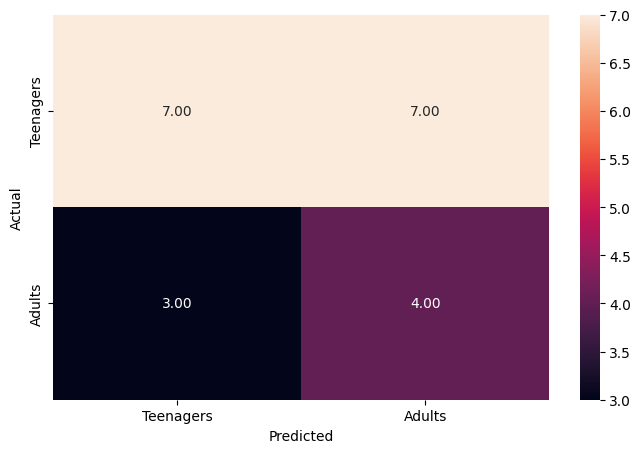

In [76]:
#make predictions
y_rf_fv = rf_fv.predict(X_test_fv)


#check the metrics
metrics_score(y_rf_fv, y_test_fv)

**To apply Decision Tree**

In [77]:
from sklearn.tree import DecisionTreeClassifier

# To create a Decision Tree classifier
dt_fv = DecisionTreeClassifier(random_state=0)

# To train the model
dt_fv.fit(X_train_fv, y_train_fv)

DecisionTreeClassifier(random_state=0)

              precision    recall  f1-score   support

      Adults       1.00      0.53      0.69        19
   Teenagers       0.18      1.00      0.31         2

    accuracy                           0.57        21
   macro avg       0.59      0.76      0.50        21
weighted avg       0.92      0.57      0.65        21



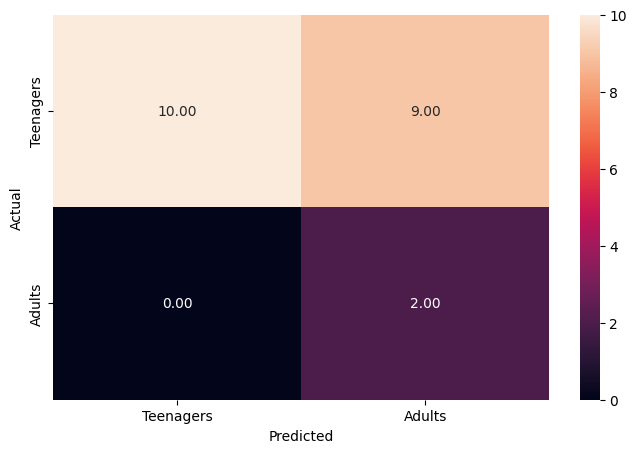

In [78]:
#make predictions
y_dt_fv = dt_fv.predict(X_test_fv)


#check the metrics
metrics_score(y_dt_fv, y_test_fv)

## **Automated Readability Index**

In [79]:
#To create a copy of the speech
data_ari = df.copy()
data_ari = data_ari.drop(['Flesch Reading Ease', 'Gunning Fog Index', 'Flesch-Kincaid Grade Level'], axis =1)
data_ari.head()

Speech  \
0  thank you that is so nice thank you well that ...   
1  in   day we are going to win the great state o...   
2  thank you in    day we are going to win the st...   
3  so how good is he how good is he special speci...   
4  thank you everybody thank you thank you very m...   

   Automated Readability Index  
0                          5.3  
1                         19.8  
2                         21.0  
3                          7.7  
4                         15.7

**Creating a Function for the Age and Grade_level**

In [80]:
# To define a function to map ARI scores to Age and Grade Level
def map_ari_to_age_and_grade(Automated_Readability_Index):
    if 1 <= Automated_Readability_Index < 5:
        age = "5-6"
        grade_level = "Kindergarten"
    elif 5 <= Automated_Readability_Index < 6:
        age = "6-7"
        grade_level = "First Grade"
    elif 6 <= Automated_Readability_Index < 7:
        age = "7-8"
        grade_level = "Second Grade"
    elif 7 <= Automated_Readability_Index < 8:
        age = "8-9"
        grade_level = "Third Grade"
    elif 8 <= Automated_Readability_Index < 9:
        age = "9-10"
        grade_level = "Fourth Grade"
    elif 9 <= Automated_Readability_Index < 10:
        age = "10-11"
        grade_level = "Fifth Grade"
    elif 10 <= Automated_Readability_Index < 11:
        age = "11-12"
        grade_level = "Sixth Grade"
    elif 11 <= Automated_Readability_Index < 12:
        age = "12-13"
        grade_level = "Seventh Grade"
    elif 12 <= Automated_Readability_Index < 13:
        age = "13-14"
        grade_level = "Eighth Grade"
    elif 13 <= Automated_Readability_Index < 14:
        age = "14-15"
        grade_level = "Ninth Grade"
    elif 14 <= Automated_Readability_Index < 15:
        age = "15-16"
        grade_level = "Tenth Grade"
    elif 15 <= Automated_Readability_Index < 16:
        age = "16-17"
        grade_level = "Eleventh Grade"
    elif 16 <= Automated_Readability_Index < 17:
        age = "17-18"
        grade_level = "Twelfth Grade"
    else:
        age = "18-22"
        grade_level = "College student"

    return age, grade_level

# To apply the function to create the new columns
data_ari[['Age', 'Grade Level']] = data_ari['Automated Readability Index'].apply(map_ari_to_age_and_grade).apply(pd.Series)

**To get the AgeTag in children Age, Teenager Age, Adult Age**

In [81]:
#To apply the agetag
def map_ari_to_age_group(ari_score):
    if 5 <= ari_score < 12:
        return "Children (6-11 years)"
    elif 12 <= ari_score < 18:
        return "Teenager (12-17 years)"
    else:
        return "Adult (18+ years)"

# Assuming your ARI scores are in a column named 'Automated Readability Index'
data_ari['AgeGroup'] = data_ari['Automated Readability Index'].apply(map_ari_to_age_group)


In [82]:
data_ari.head()

Speech  \
0  thank you that is so nice thank you well that ...   
1  in   day we are going to win the great state o...   
2  thank you in    day we are going to win the st...   
3  so how good is he how good is he special speci...   
4  thank you everybody thank you thank you very m...   

   Automated Readability Index    Age      Grade Level                AgeGroup  
0                          5.3    6-7      First Grade   Children (6-11 years)  
1                         19.8  18-22  College student       Adult (18+ years)  
2                         21.0  18-22  College student       Adult (18+ years)  
3                          7.7    8-9      Third Grade   Children (6-11 years)  
4                         15.7  16-17   Eleventh Grade  Teenager (12-17 years)

In [83]:
#To show the unique value of Age
data_ari['AgeGroup'].unique()

array(['Children (6-11 years)', 'Adult (18+ years)',
       'Teenager (12-17 years)'], dtype=object)

In [84]:
#To show the unique value of Age
data_ari['Age'].unique()

array(['6-7', '18-22', '8-9', '16-17', '7-8', '17-18', '13-14', '11-12',
       '12-13', '5-6', '10-11', '9-10'], dtype=object)

In [85]:
#To show the unique value of Grade_Level
data_ari['Grade Level'].unique()

array(['First Grade', 'College student', 'Third Grade', 'Eleventh Grade',
       'Second Grade', 'Twelfth Grade', 'Eighth Grade', 'Sixth Grade',
       'Seventh Grade', 'Kindergarten', 'Fifth Grade', 'Fourth Grade'],
      dtype=object)

### **Explorary Data Analysics**

**To show the plot of the Age Class**

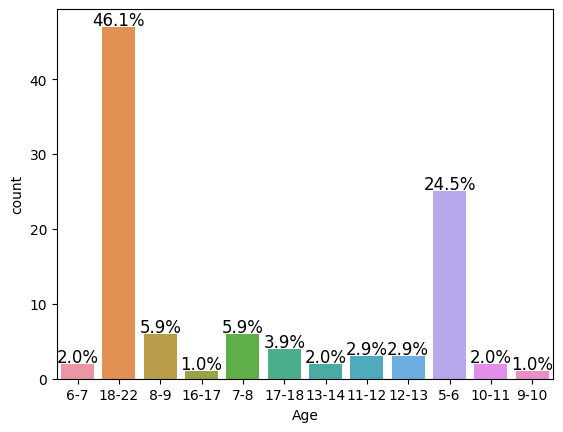

In [86]:
#To plot the disribution of the class label
def bar_plot(data, feature):
  #to create the countplot
  plot = sns.countplot(x = feature, data = data_ari)

  #To the length of the data
  total = len(data)


  for p in plot.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height() / total)
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        plot.annotate(percentage, (x, y), ha='center', va='center', size=12, xytext=(0, 5), textcoords='offset points')

plt.show()
bar_plot(data_ari, 'Age')

**To show plot of the AgeGroup**

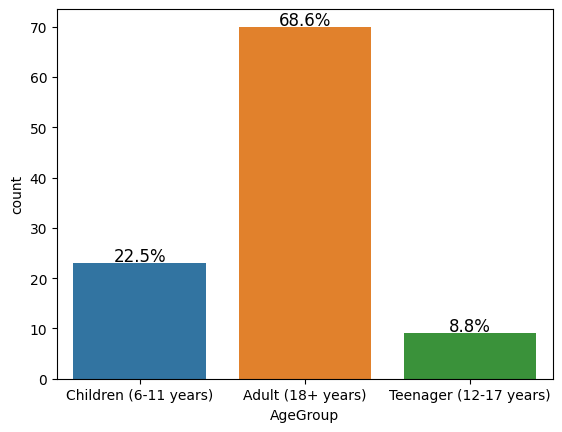

In [87]:
#To plot the disribution of the class label
def bar_plot(data, feature):
  #To create the countplot
  plot = sns.countplot(x = feature, data = data_ari)

  #To the length of the data
  total = len(data)


  for p in plot.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height() / total)
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        plot.annotate(percentage, (x, y), ha='center', va='center', size=12, xytext=(0, 5), textcoords='offset points')

plt.show()
bar_plot(data_ari, 'AgeGroup')

**To show the Box plot of the Readability Age**

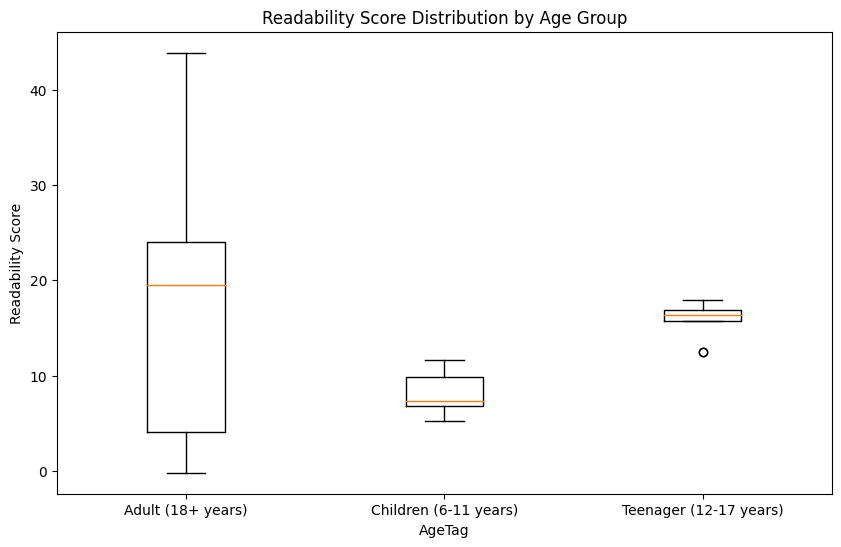

In [88]:
# To create a dictionary to store the data frames
data_frames = {}

# To group the data by 'AgeTag' and store each group's data frame in the dictionary
grouped_data = data_ari.groupby('AgeGroup')
for name, group in grouped_data:
    data_frames[name] = group['Automated Readability Index'].values

# To create a list of data to plot
data_to_plot = [data for data in data_frames.values()]

# To create a box plot for each age group
plt.figure(figsize=(10, 6))
plt.boxplot(data_to_plot, labels=data_frames.keys())
plt.title('Readability Score Distribution by Age Group')
plt.xlabel('AgeTag')
plt.ylabel('Readability Score')
plt.show()

**To show the wordcloud of the AgeGroup**

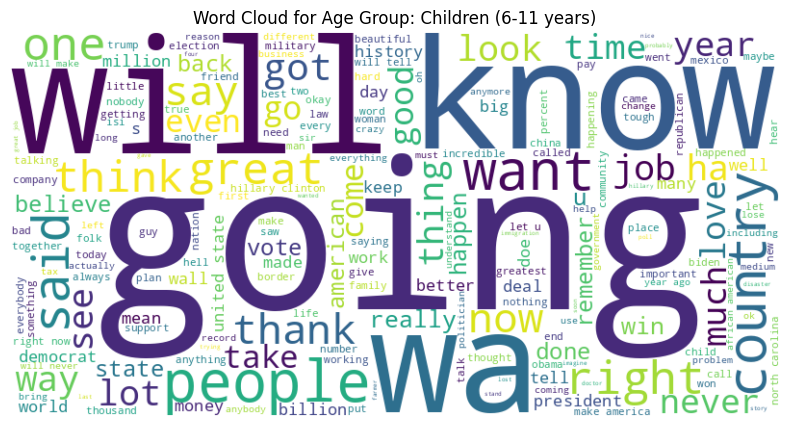

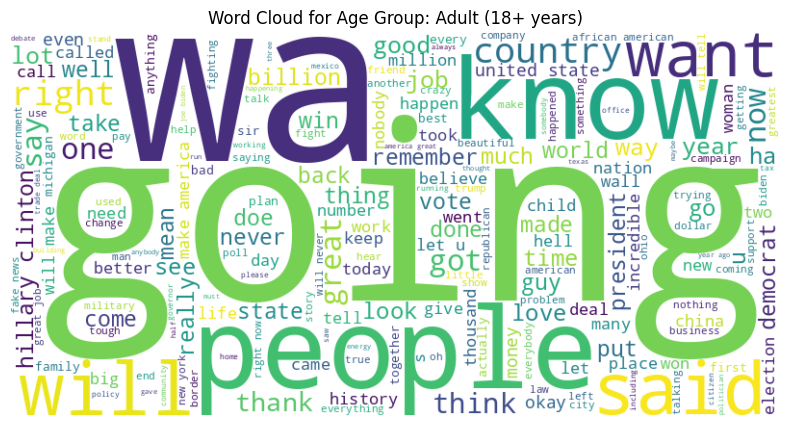

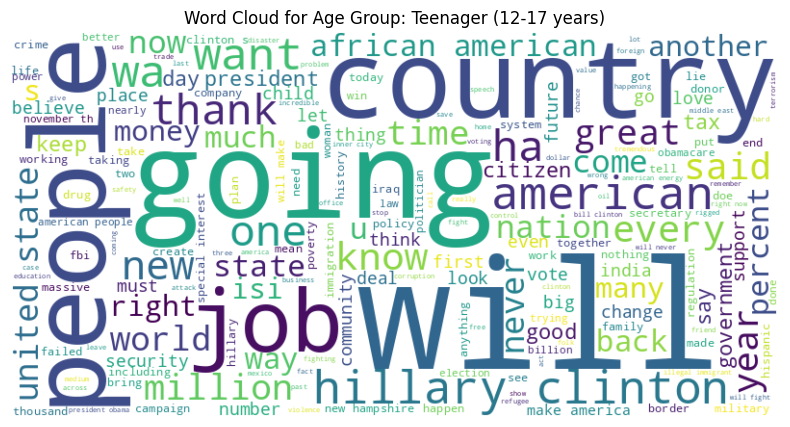

In [89]:
# To create a function to generate word clouds
def generate_word_cloud(age_group):
    # To filter the data for the specified age group
    age_group_data = data_ari[data_ari['AgeGroup'] == age_group]

    # To combine all text in the age group into a single string
    text = ' '.join(age_group_data['Speech'])

    # To generate the word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

    # To display the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for Age Group: {age_group}')
    plt.axis('off')
    plt.show()

# To get unique age groups
age_groups = data_ari['AgeGroup'].unique()

# To generate word clouds for each age group
for age_group in age_groups:
    generate_word_cloud(age_group)

**Applying the Term frequency- Inverse Document Frequency**

In [90]:
#using TfidfVectorizer to convert text data to numbers
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_ari = TfidfVectorizer(max_features = 9700)
#transform the text with TF-IDF
data_tfidf_ari = tfidf_ari.fit_transform(data_ari['Speech'])

#Feature shape
data_tfidf_ari = data_tfidf_ari.toarray()

In [91]:
data_tfidf_ari.shape[1]

9628

**Selecting Features and Target**

In [92]:
from sklearn.model_selection import train_test_split
#To select the features and target
X = data_tfidf_ari
y = data_ari.AgeGroup

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=None)

**Applying Oversampling**

In [93]:
#Apllying oversampler to the training data due to the imbalanced
from imblearn.over_sampling import RandomOverSampler
oversampler = RandomOverSampler(sampling_strategy='auto', random_state=0)
X_ari, y_ari = oversampler.fit_resample(X, y)

X_train_ari, X_test_ari, y_train_ari, y_test_ari = train_test_split(X_ari, y_ari, test_size=0.2, random_state=0,)

In [94]:
y_ari.value_counts()

Children (6-11 years)     70
Adult (18+ years)         70
Teenager (12-17 years)    70
Name: AgeGroup, dtype: int64

In [95]:
#A function to print the classification report and get confusion matrix
from sklearn.metrics._plot.confusion_matrix import confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix
def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))
    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(8, 5))
    sns.heatmap(cm, annot=True, fmt='.2f', xticklabels=['Children (6-11 years)', 'Adult (18+ years)',
       'Teenager (12-17 years)'], yticklabels=['Children (6-11 years)', 'Adult (18+ years)',
       'Teenager (12-17 years)'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

**Apply Random Forest**

In [96]:
from sklearn.ensemble import RandomForestClassifier
#To train the model
rf_ari = RandomForestClassifier(random_state = 0, n_jobs = -1)

rf_ari.fit(X_train_ari, y_train_ari)

RandomForestClassifier(n_jobs=-1, random_state=0)

                        precision    recall  f1-score   support

     Adult (18+ years)       0.81      0.87      0.84        15
 Children (6-11 years)       0.86      0.86      0.86        14
Teenager (12-17 years)       1.00      0.92      0.96        13

              accuracy                           0.88        42
             macro avg       0.89      0.88      0.89        42
          weighted avg       0.89      0.88      0.88        42



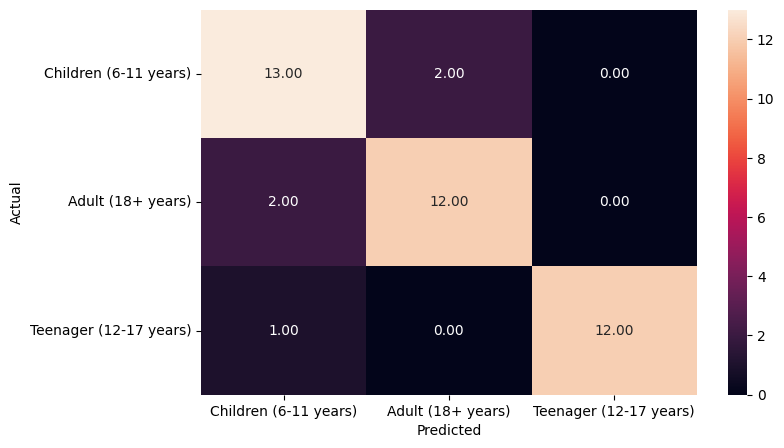

In [97]:
#make predictions
y_rf_ari = rf_ari.predict(X_test_ari)


#check the metrics
metrics_score(y_rf_ari, y_test_ari)

**To apply Decision Tree**

In [98]:
from sklearn.tree import DecisionTreeClassifier

# To create a Decision Tree classifier
dt_ari = DecisionTreeClassifier(random_state=0)

# Train the model
dt_ari.fit(X_train_ari, y_train_ari)

DecisionTreeClassifier(random_state=0)

                        precision    recall  f1-score   support

     Adult (18+ years)       0.88      0.88      0.88        16
 Children (6-11 years)       0.86      0.92      0.89        13
Teenager (12-17 years)       1.00      0.92      0.96        13

              accuracy                           0.90        42
             macro avg       0.91      0.91      0.91        42
          weighted avg       0.91      0.90      0.91        42



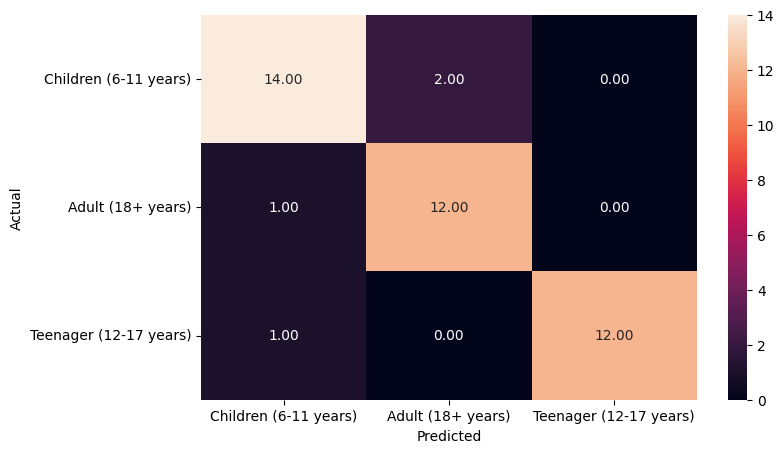

In [99]:
y_dt_ari = dt_ari.predict(X_test_ari)


#check the metrics
metrics_score(y_dt_ari, y_test_ari)

### **To show the features importance of the model**

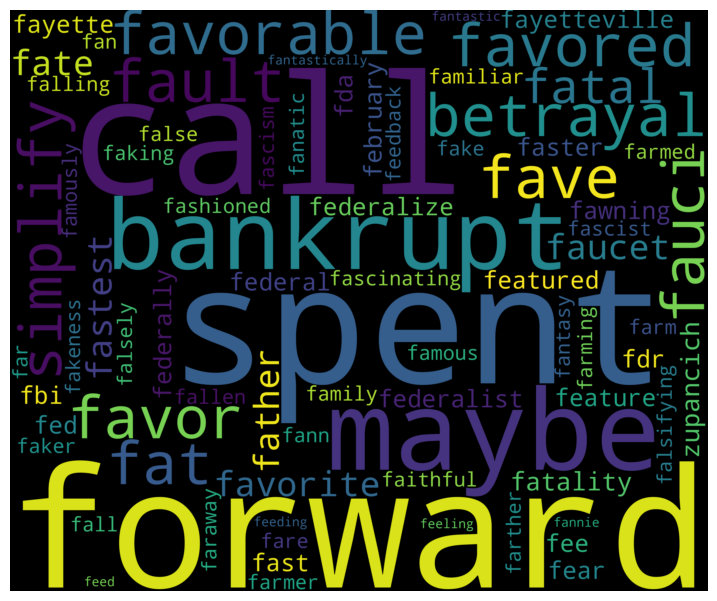

In [100]:
feature_names = tfidf_ari.get_feature_names_out()

get_top40_words(dt_ari,feature_names)

## **Cross Validation**

In [101]:
#To create an instance of the Kfold
kfold = KFold(n_splits=5, shuffle=True, random_state=0)


#To create an instance of the model
dt_ari = DecisionTreeClassifier(random_state=0)

#scores = cross_val_score(estimator=gb, X=X_train, y=y_train, cv=kfold, scoring='recall')

# Define the scoring metric as accuracy
#scoring = make_scorer(accuracy_score)

# Perform cross-validation using accuracy as the scoring metric
scores = cross_val_score(estimator=dt_ari, X=X_train_ari, y=y_train_ari, cv=kfold, scoring='accuracy')

# Print the scores
print(scores)

[0.91176471 0.97058824 0.94117647 0.96969697 0.6969697 ]


### **To Apply the Wordvec**

In [102]:
#Import the word2vec from gensim models

from gensim.models import Word2Vec

#Get the list of the data
word_list = [sent.split() for sent in data_ari["Speech"]]

In [103]:
len(word_list)

102

In [104]:
#create wordvec model
model_ari = Word2Vec(word_list, sg = 1)

In [105]:
#get the vocabulary of the data
vocab = model_ari.wv.key_to_index

In [106]:
len(vocab)

4208

In [107]:
#Top word similar to student
model_ari.wv.similar_by_word('student')

[('tuition', 0.8645617961883545),
 ('contribute', 0.8199648857116699),
 ('dependent', 0.8145735263824463),
 ('provide', 0.8132129311561584),
 ('university', 0.8109363913536072),
 ('deduct', 0.8089037537574768),
 ('employer', 0.8057849407196045),
 ('providing', 0.805610179901123),
 ('loan', 0.8006445169448853),
 ('available', 0.8000913858413696)]

In [108]:
import numpy as np
#To create a vector representation of the text data Word2Vec model
def get_embeddings(model_ari, words, vocab):
  embeddings =[]
  for word in words:
    if word in vocab:
      embeddings.append(model_ari.wv[word])
    if len(embeddings) == 0:
      return np.zeros(model_ari.vector_size)
    else:
      return np.mean(embeddings, axis = 0)

def word_vectoriser(model_ari, corpus):
  #To get unique words in the vocabulary
  vocab = set(model_ari.wv.key_to_index)
  features = [get_embeddings(model_ari, tokenized_sentence, vocab) for tokenized_sentence in corpus]
  return np.array(features)



In [109]:
feature_array = word_vectoriser(model_ari=model_ari, corpus=word_list)

In [110]:
pd.DataFrame(feature_array)

0         1         2         3         4         5         6   \
0    0.426480  0.532530 -0.471801  0.239254  0.787354  0.137578 -0.073963   
1   -0.339128  0.391831 -0.065556 -0.162644 -0.115985 -0.203315 -0.147294   
2    0.426480  0.532530 -0.471801  0.239254  0.787354  0.137578 -0.073963   
3   -0.208840  0.070863  0.249731  0.104951  0.514053 -0.381511  0.088466   
4    0.426480  0.532530 -0.471801  0.239254  0.787354  0.137578 -0.073963   
..        ...       ...       ...       ...       ...       ...       ...   
97   0.426480  0.532530 -0.471801  0.239254  0.787354  0.137578 -0.073963   
98   0.426480  0.532530 -0.471801  0.239254  0.787354  0.137578 -0.073963   
99   0.057113 -0.029955  0.113841  0.053920  0.029985 -0.387826 -0.073048   
100  0.426480  0.532530 -0.471801  0.239254  0.787354  0.137578 -0.073963   
101 -0.075530 -0.084817 -0.251763  0.264792  0.090131 -0.144944 -0.103416   

           7         8         9   ...        90        91        92  \
0    0.122348  0.299863  0.193639  ...  0.119709  0.501912 -0.183763   
1    0.451460 -0.086216 -0.017386  ...  0.699793  0.027341 -0.052089   
2    0.122348  0.299863  0.193639  ...  0.119709  0.501912 -0.183763   
3    0.288434 -0.464407 -0.117682  ...  0.124690  0.006070 -0.175833   
4    0.122348  0.299863  0.193639  ...  0.119709  0.501912 -0.183763   
..        ...       ...       ...  ...       ...       ...       ...   
97   0.122348  0.299863  0.193639  ...  0.119709  0.501912 -0.183763   
98   0.122348  0.299863  0.193639  ...  0.119709  0.501912 -0.183763   
99   0.420031 -0.429923 -0.038392  ...  0.132844 -0.023799  0.024318   
100  0.122348  0.299863  0.193639  ...  0.119709  0.501912 -0.183763   
101  0.174949  0.004220  0.172206  ...  0.034654  0.109014 -0.128117   

           93        94        95        96        97        98        99  
0   -0.081999  0.010012 -0.121310  0.165686  0.575571  0.332211  0.562925  
1    0.134339 -0.168799  0.077579  0.130761 -0.321035  0.005201  0.066195  
2   -0.081999  0.010012 -0.121310  0.165686  0.575571  0.332211  0.562925  
3   -0.098886  0.014303 -0.021645  0.233750  0.241433  0.029931 -0.330027  
4   -0.081999  0.010012 -0.121310  0.165686  0.575571  0.332211  0.562925  
..        ...       ...       ...       ...       ...       ...       ...  
97  -0.081999  0.010012 -0.121310  0.165686  0.575571  0.332211  0.562925  
98  -0.081999  0.010012 -0.121310  0.165686  0.575571  0.332211  0.562925  
99   0.097964 -0.019443  0.031872 -0.250001 -0.459181 -0.013497  0.049805  
100 -0.081999  0.010012 -0.121310  0.165686  0.575571  0.332211  0.562925  
101  0.011942  0.128980  0.268791 -0.026253 -0.211198  0.153796  0.151379  

[102 rows x 100 columns]

In [111]:
#selecting the features and target
X_wv= feature_array
y_wv = data_ari.AgeGroup

In [112]:
#Apllying oversampler to the training data due to the imbalanced
from imblearn.over_sampling import RandomOverSampler
oversampler = RandomOverSampler(sampling_strategy='auto', random_state=0)
X_ariw, y_ariw = oversampler.fit_resample(X_wv, y_wv)

X_train_ariw, X_test_ariw, y_train_ariw, y_test_ariw = train_test_split(X_ariw, y_ariw, test_size=0.2, random_state=0,)

In [113]:

#To train the model
rf_ariw = RandomForestClassifier(random_state = 0, n_jobs = -1)

rf_ariw.fit(X_train_ariw, y_train_ariw)

RandomForestClassifier(n_jobs=-1, random_state=0)

                        precision    recall  f1-score   support

     Adult (18+ years)       0.25      1.00      0.40         4
 Children (6-11 years)       0.36      0.83      0.50         6
Teenager (12-17 years)       1.00      0.38      0.55        32

              accuracy                           0.50        42
             macro avg       0.54      0.74      0.48        42
          weighted avg       0.84      0.50      0.53        42



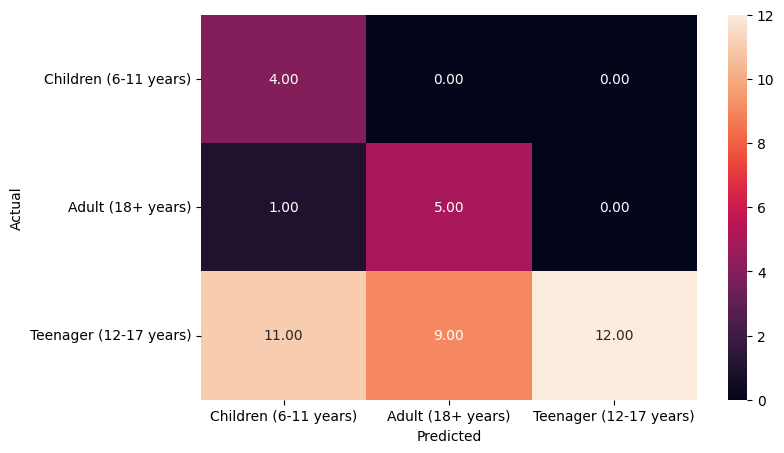

In [114]:
#make predictions
y_rf_ariw = rf_ariw.predict(X_test_ariw)


#check the metrics
metrics_score(y_rf_ariw, y_test_ariw)

**To apply Decision Tree**

In [115]:
# To create a Decision Tree classifier
dt_ariw = DecisionTreeClassifier(random_state=0)

# Train the model
dt_ariw.fit(X_train_ariw, y_train_ariw)

DecisionTreeClassifier(random_state=0)

                        precision    recall  f1-score   support

     Adult (18+ years)       0.19      1.00      0.32         3
 Children (6-11 years)       0.36      0.83      0.50         6
Teenager (12-17 years)       1.00      0.36      0.53        33

              accuracy                           0.48        42
             macro avg       0.51      0.73      0.45        42
          weighted avg       0.85      0.48      0.51        42



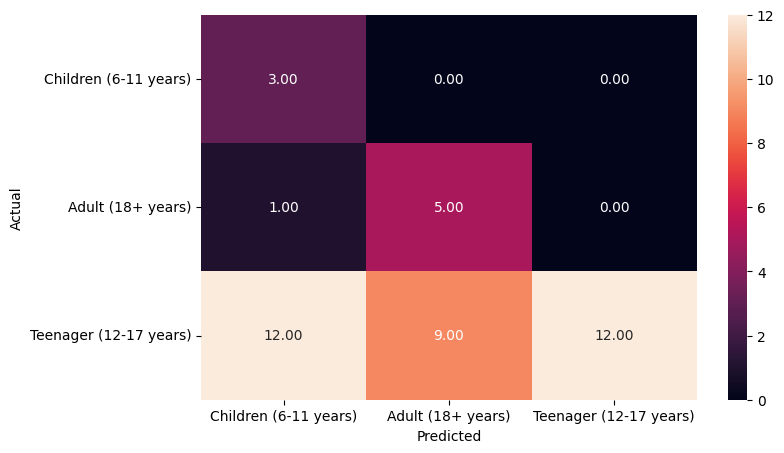

In [116]:
y_dt_ariw = dt_ariw.predict(X_test_ariw)


#check the metrics
metrics_score(y_dt_ariw, y_test_ariw)

## **Gunning Fog Index**

In [117]:
#To create a copy of the Gunning fog index score
data_fog = df.copy()
data_fog = data_fog.drop(['Flesch-Kincaid Grade Level','Flesch Reading Ease','Automated Readability Index'], axis = 1)
data_fog.head()

Speech  Gunning Fog Index
0  thank you that is so nice thank you well that ...              17.44
1  in   day we are going to win the great state o...              29.12
2  thank you in    day we are going to win the st...              30.08
3  so how good is he how good is he special speci...              19.32
4  thank you everybody thank you thank you very m...              25.76

**To create a function for the gumming score level**

In [118]:
def map_fog_to_reading_level(Gunning_Fog_Index):
    if Gunning_Fog_Index >= 17:
        return "College graduate"
    elif Gunning_Fog_Index >= 16:
        return "College senior"
    elif Gunning_Fog_Index >= 15:
        return "College junior"
    elif Gunning_Fog_Index >= 14:
        return "College sophomore"
    elif Gunning_Fog_Index >= 13:
        return "College freshman"
    elif Gunning_Fog_Index >= 12:
        return "High school senior"
    elif Gunning_Fog_Index >= 11:
        return "High school junior"
    elif Gunning_Fog_Index >= 10:
        return "High school sophomore"
    elif Gunning_Fog_Index >= 9:
        return "High school freshman"
    elif Gunning_Fog_Index >= 8:
        return "Eighth grade"
    elif Gunning_Fog_Index >= 7:
        return "Seventh grade"
    elif Gunning_Fog_Index >= 6:
        return "Sixth grade"
    else:
        return "Unknown"

# To apply the function to create the new column
data_fog['Reading Level by Grade'] = data_fog['Gunning Fog Index'].apply(map_fog_to_reading_level)

In [119]:
data_fog.head()

Speech  Gunning Fog Index  \
0  thank you that is so nice thank you well that ...              17.44   
1  in   day we are going to win the great state o...              29.12   
2  thank you in    day we are going to win the st...              30.08   
3  so how good is he how good is he special speci...              19.32   
4  thank you everybody thank you thank you very m...              25.76   

  Reading Level by Grade  
0       College graduate  
1       College graduate  
2       College graduate  
3       College graduate  
4       College graduate

In [120]:
# To define a dictionary for reading levels by grade
Fog_Encoded = {
    "College graduate": 0,
    "College senior": 1,
    "College junior": 2,
    "College sophomore": 3,
    "College freshman": 4,
    "High school senior": 5,
    "High school junior": 6,
    "High school sophomore": 7,
    "High school freshman": 8,
    "Eighth grade": 9,
    "Seventh grade": 10,
    "Sixth grade": 11,
    "Unknown": 12
}

# To create a new column with the encoded numerical values
data_fog['Fog_Encoded'] = data_fog['Reading Level by Grade'].map(Fog_Encoded)

In [121]:
data_fog.head()

Speech  Gunning Fog Index  \
0  thank you that is so nice thank you well that ...              17.44   
1  in   day we are going to win the great state o...              29.12   
2  thank you in    day we are going to win the st...              30.08   
3  so how good is he how good is he special speci...              19.32   
4  thank you everybody thank you thank you very m...              25.76   

  Reading Level by Grade  Fog_Encoded  
0       College graduate            0  
1       College graduate            0  
2       College graduate            0  
3       College graduate            0  
4       College graduate            0

In [122]:
#To apply the agetag to the score
def map_fog_to_age_group(Gunning_Fog_Index):
    if Gunning_Fog_Index >= 17:
        return "Adult"
    elif Gunning_Fog_Index >= 13:
        return "Teenager"
    elif Gunning_Fog_Index >= 6:
        return "Child"
    else:
        return "Unknown"

# To apply the function to create the new column
data_fog['AgeTag'] = data_fog['Gunning Fog Index'].apply(map_fog_to_age_group)

In [123]:
data_fog.head()

Speech  Gunning Fog Index  \
0  thank you that is so nice thank you well that ...              17.44   
1  in   day we are going to win the great state o...              29.12   
2  thank you in    day we are going to win the st...              30.08   
3  so how good is he how good is he special speci...              19.32   
4  thank you everybody thank you thank you very m...              25.76   

  Reading Level by Grade  Fog_Encoded AgeTag  
0       College graduate            0  Adult  
1       College graduate            0  Adult  
2       College graduate            0  Adult  
3       College graduate            0  Adult  
4       College graduate            0  Adult

In [124]:
#To get the unique value of the agetag
data_fog['AgeTag'].unique()

array(['Adult', 'Teenager'], dtype=object)

In [125]:
#To get the unique value of the scores
data_fog['Gunning Fog Index'].unique()

array([17.44, 29.12, 30.08, 19.32, 25.76, 36.72, 29.44, 32.28, 28.92,
       30.88, 34.12, 28.52, 27.68, 27.56, 33.2 , 18.48, 30.04, 32.4 ,
       17.28, 33.6 , 26.8 , 34.32, 34.44, 23.24, 23.2 , 21.4 , 22.52,
       30.84, 29.28, 37.64, 17.04, 33.48, 31.92, 29.88, 48.4 , 19.16,
       32.76, 35.64, 34.16, 32.44, 30.92, 31.88, 28.68, 18.88, 33.16,
       32.6 , 27.52, 21.96, 30.76, 20.52, 28.32, 26.36, 28.48, 38.44,
       28.88, 34.4 , 13.08, 28.24, 30.36, 21.28, 18.84, 26.08, 16.28,
       14.2 , 15.36, 15.64, 19.04, 16.6 , 15.32, 19.  , 14.88, 13.24,
       18.6 , 16.64, 21.92, 16.36, 16.16, 17.96, 18.68, 16.12, 16.68,
       18.24, 16.32, 16.96, 15.  , 14.52, 16.8 , 16.48, 16.72, 18.72,
       15.72, 20.  , 16.4 , 22.36, 20.76, 29.92])

In [126]:
#To get the unique value of the reading level
data_fog['Reading Level by Grade'].unique()

array(['College graduate', 'College freshman', 'College senior',
       'College sophomore', 'College junior'], dtype=object)

In [127]:
#To get unique value of the encoded
data_fog['Fog_Encoded'].unique()

array([0, 4, 1, 3, 2])

**Explorary Data analytics**

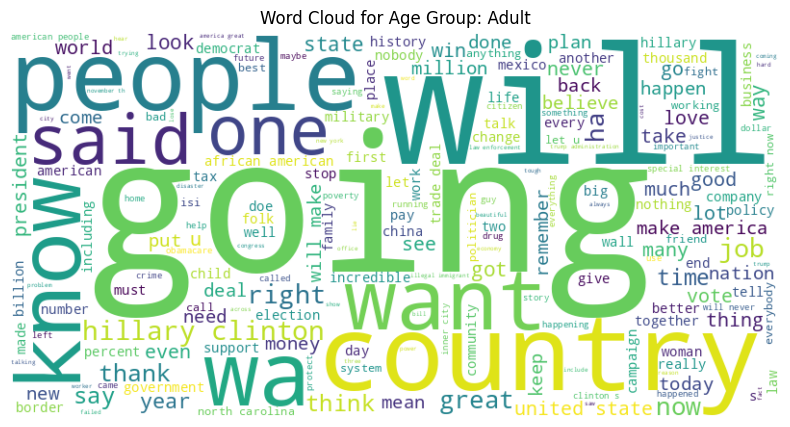

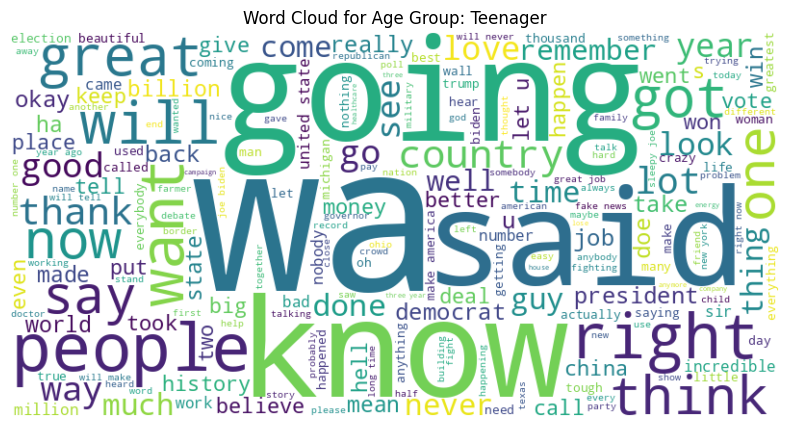

In [128]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'data' with columns 'AgeTag' and 'Speech'

# To create a function to generate word clouds
def generate_word_cloud(age_group):
    # Filter the data for the specified age group
    age_group_data = data_fog[data_fog['AgeTag'] == age_group]

    # To combine all text in the age group into a single string
    text = ' '.join(age_group_data['Speech'])

    # To generate the word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

    # To display the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for Age Group: {age_group}')
    plt.axis('off')
    plt.show()

# To get unique age groups
age_groups = data_fog['AgeTag'].unique()

# To generate word clouds for each age group
for age_group in age_groups:
    generate_word_cloud(age_group)

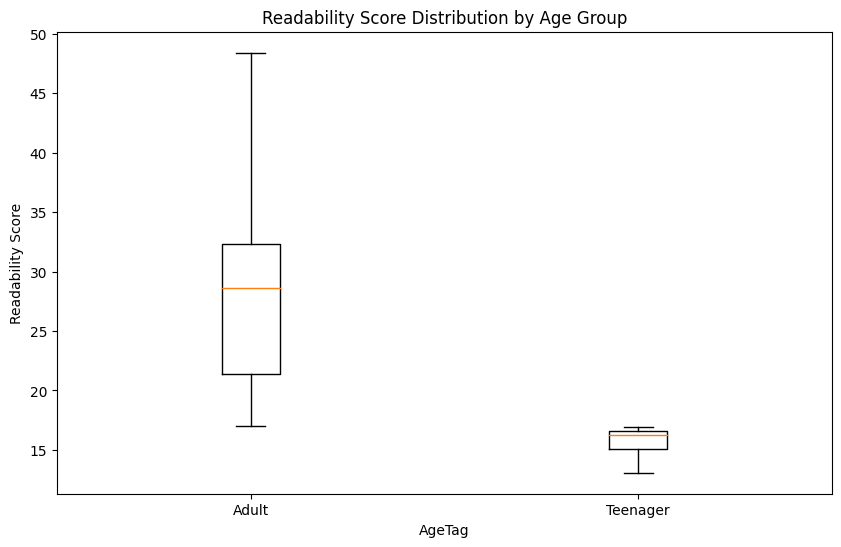

In [129]:
# To create a dictionary to store the data frames
data_frames = {}

# To group the data by 'AgeTag' and store each group's data frame in the dictionary
grouped_data = data_fog.groupby('AgeTag')
for name, group in grouped_data:
    data_frames[name] = group['Gunning Fog Index'].values

# To create a list of data to plot
data_to_plot = [data for data in data_frames.values()]

# To create a box plot for each age group
plt.figure(figsize=(10, 6))
plt.boxplot(data_to_plot, labels=data_frames.keys())
plt.title('Readability Score Distribution by Age Group')
plt.xlabel('AgeTag')
plt.ylabel('Readability Score')
plt.show()

**To show the plot of the Reading Level Encoded Class**

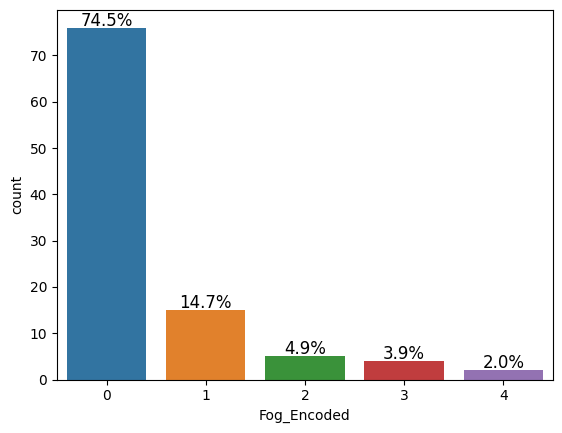

In [130]:
#To plot the disribution of the class label
def bar_plot(data, feature):
  #To create the countplot
  plot = sns.countplot(x = feature, data = data_fog)

  #To the length of the data
  total = len(data)


  for p in plot.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height() / total)
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        plot.annotate(percentage, (x, y), ha='center', va='center', size=12, xytext=(0, 5), textcoords='offset points')

plt.show()
bar_plot(data_fog, 'Fog_Encoded')

**To show the plot of the Reading Level AgeTag**

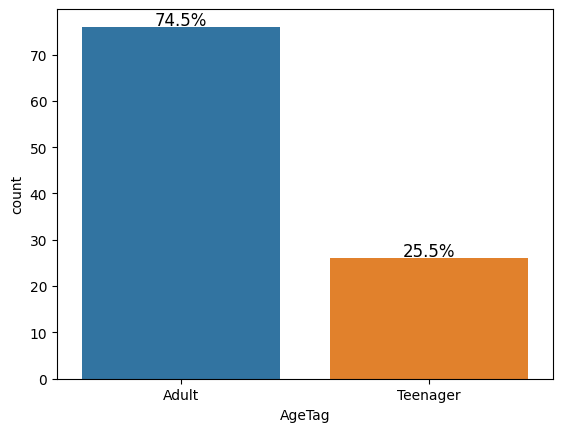

In [131]:
#To plot the disribution of the class label
def bar_plot(data, feature):
  #To create the countplot
  plot = sns.countplot(x = feature, data = data_fog)

  #To the length of the data
  total = len(data)


  for p in plot.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height() / total)
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        plot.annotate(percentage, (x, y), ha='center', va='center', size=12, xytext=(0, 5), textcoords='offset points')

plt.show()
bar_plot(data_fog, 'AgeTag')

**Applying the Term frequency- Inverse Document Frequency**

In [132]:
#using TfidfVectorizer to convert text data to numbers
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_fog = TfidfVectorizer(max_features = 8000)
#transform the text with TF-IDF
data_tfidf_fog = tfidf_fog.fit_transform(data_fog['Speech'])

#Feature shape
data_tfidf_fog = data_tfidf_fog.toarray()

**Selecting Features and Target**

In [133]:
#To select the features and target
X_f = data_tfidf_fog
y_f = data_fog.AgeTag


**Applying Oversampling**

In [134]:
from sklearn.model_selection import train_test_split
#Apllying oversampler to the training data due to the imbalanced
from imblearn.over_sampling import RandomOverSampler
oversampler = RandomOverSampler(sampling_strategy='auto', random_state=0)
X_fog, y_fog = oversampler.fit_resample(X_f, y_f)

X_train_fog, X_test_fog, y_train_fog, y_test_fog = train_test_split(X_fog, y_fog, test_size=0.2, random_state=0,)

In [135]:
y_fog.value_counts()

Adult       76
Teenager    76
Name: AgeTag, dtype: int64

In [136]:
from sklearn.metrics._plot.confusion_matrix import confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix
# A function to print the classification report and get confusion matrix
def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))
    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(8, 5))
    sns.heatmap(cm, annot=True, fmt='.2f', xticklabels=['Adult', 'Teenager'], yticklabels=['Adult', 'Teenager'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

**Apply Random Forest**

In [137]:
from sklearn.ensemble import RandomForestClassifier
#To train the model
rf_fog = RandomForestClassifier(random_state = 0, n_jobs = -1)

rf_fog.fit(X_train_fog, y_train_fog)

RandomForestClassifier(n_jobs=-1, random_state=0)

              precision    recall  f1-score   support

       Adult       0.89      1.00      0.94        16
    Teenager       1.00      0.87      0.93        15

    accuracy                           0.94        31
   macro avg       0.94      0.93      0.93        31
weighted avg       0.94      0.94      0.94        31



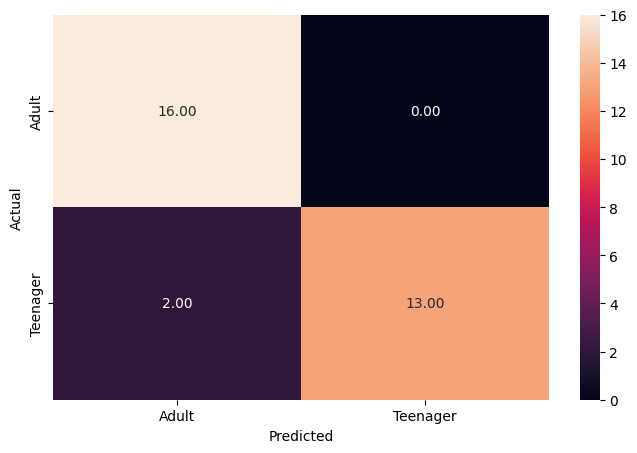

In [138]:
#make predictions
y_rf_fog = rf_fog.predict(X_test_fog)


#check the metrics
metrics_score(y_rf_fog, y_test_fog)

**To apply Decision Tree Model**

In [139]:
# To create a Decision Tree classifier
dt_fog = DecisionTreeClassifier(random_state=0)

# Train the model
dt_fog.fit(X_train_fog, y_train_fog)

DecisionTreeClassifier(random_state=0)

              precision    recall  f1-score   support

       Adult       0.89      1.00      0.94        16
    Teenager       1.00      0.87      0.93        15

    accuracy                           0.94        31
   macro avg       0.94      0.93      0.93        31
weighted avg       0.94      0.94      0.94        31



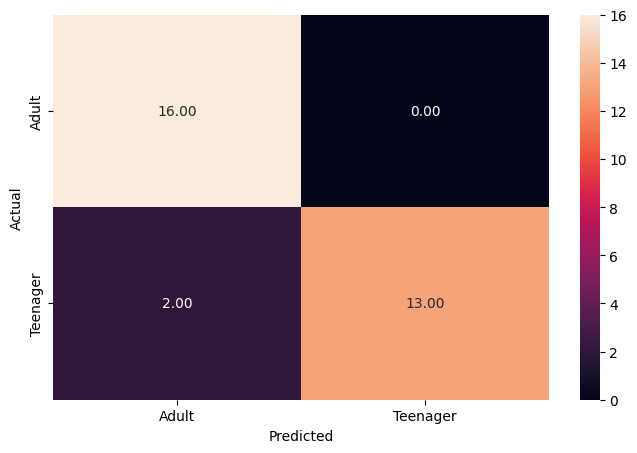

In [140]:
y_dt_fog = dt_fog.predict(X_test_fog)


#check the metrics
metrics_score(y_dt_fog, y_test_fog)

### **To show the features importance of the model**

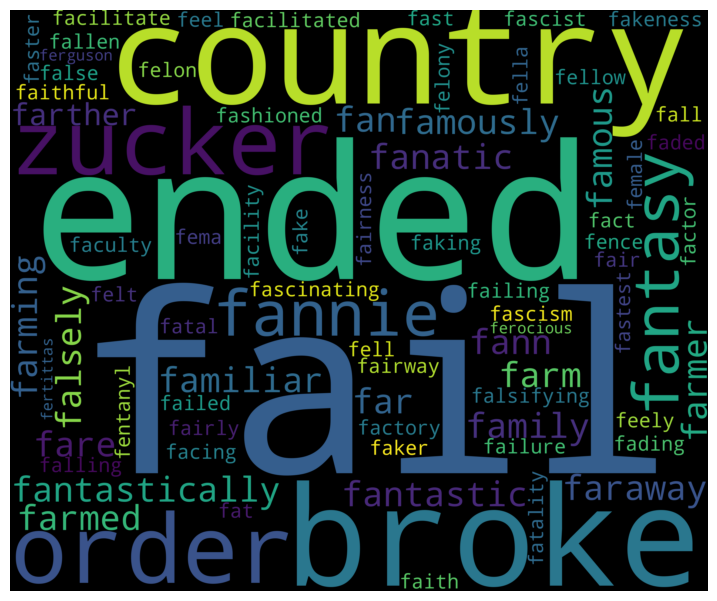

In [141]:
feature_names = tfidf_fog.get_feature_names_out()

get_top40_words(dt_fog,feature_names)

### **Cross Validation**

In [142]:
#To create an instance of the Kfold
kfold = KFold(n_splits=5, shuffle=True, random_state=0)


#To create an instance of the model
dt_fog = DecisionTreeClassifier(random_state=0)

#scores = cross_val_score(estimator=gb, X=X_train, y=y_train, cv=kfold, scoring='recall')

# Define the scoring metric as accuracy
#scoring = make_scorer(accuracy_score)

# Perform cross-validation using accuracy as the scoring metric
scores = cross_val_score(estimator=dt_fog, X=X_train_fog, y=y_train_fog, cv=kfold, scoring='accuracy')

# Print the scores
print(scores)

[0.96       0.66666667 0.875      0.91666667 1.        ]


## **Flesch-Kincaid Grade Level**

In [143]:
data_kin = df.copy()
data_kin = data_kin.drop(['Gunning Fog Index','Flesch Reading Ease','Automated Readability Index'], axis = 1)
data_kin.head()

Speech  \
0  thank you that is so nice thank you well that ...   
1  in   day we are going to win the great state o...   
2  thank you in    day we are going to win the st...   
3  so how good is he how good is he special speci...   
4  thank you everybody thank you thank you very m...   

   Flesch-Kincaid Grade Level  
0                        13.2  
1                        24.6  
2                        25.5  
3                        15.0  
4                        21.3

**To create a function for the Flesch-Kincaid Grade Level**

In [144]:
def map_flesch_kincaid_to_level(score):
    if 5.0 <= score <= 5.9:
        return "5th Grade", "Very easy to read"
    elif 6.0 <= score <= 6.9:
        return "6th Grade", "Easy to read"
    elif 7.0 <= score <= 7.9:
        return "7th Grade", "Fairly easy to read"
    elif 8.0 <= score <= 9.9:
        return "8th & 9th Grade", "Conversational English"
    elif 10.0 <= score <= 12.9:
        return "10th , 11th & 12th Grade", "Fairly difficult to read"
    elif 13.0 <= score <= 15.9:
        return "College", "Difficult to read"
    elif 16.0 <= score <= 17.9:
        return "College Graduate", "Very difficult to read"
    else:
        return "Professional", "Extremely difficult to read"

In [145]:
data_kin['School Level'], data_kin['Comprehension'] = zip(*data_kin['Flesch-Kincaid Grade Level'].apply(map_flesch_kincaid_to_level))

In [146]:
data_kin.head()

Speech  \
0  thank you that is so nice thank you well that ...   
1  in   day we are going to win the great state o...   
2  thank you in    day we are going to win the st...   
3  so how good is he how good is he special speci...   
4  thank you everybody thank you thank you very m...   

   Flesch-Kincaid Grade Level  School Level                Comprehension  
0                        13.2       College            Difficult to read  
1                        24.6  Professional  Extremely difficult to read  
2                        25.5  Professional  Extremely difficult to read  
3                        15.0       College            Difficult to read  
4                        21.3  Professional  Extremely difficult to read

In [147]:
#To get the unique value for the School level
data_kin['School Level'].unique()

array(['College', 'Professional', 'College Graduate',
       '10th , 11th & 12th Grade', '8th & 9th Grade'], dtype=object)

In [148]:
#To get the unique value for the Comprehension
data_kin['Comprehension'].unique()

array(['Difficult to read', 'Extremely difficult to read',
       'Very difficult to read', 'Fairly difficult to read',
       'Conversational English'], dtype=object)

In [149]:
def categorize_age_group(score):
    if 5.0 <= score <= 5.9:
        return "Children"
    elif 6.0 <= score <= 17.9:
        return "Teenagers"
    else:
        return "Adult"

# Apply the function to your DataFrame to create the "Age Group" column
data_kin['AgeTag_Kin'] = data_kin['Flesch-Kincaid Grade Level'].apply(categorize_age_group)

In [150]:
data_kin.head()

Speech  \
0  thank you that is so nice thank you well that ...   
1  in   day we are going to win the great state o...   
2  thank you in    day we are going to win the st...   
3  so how good is he how good is he special speci...   
4  thank you everybody thank you thank you very m...   

   Flesch-Kincaid Grade Level  School Level                Comprehension  \
0                        13.2       College            Difficult to read   
1                        24.6  Professional  Extremely difficult to read   
2                        25.5  Professional  Extremely difficult to read   
3                        15.0       College            Difficult to read   
4                        21.3  Professional  Extremely difficult to read   

  AgeTag_Kin  
0  Teenagers  
1      Adult  
2      Adult  
3  Teenagers  
4      Adult

In [151]:
#To get the unigue Agetag
data_kin['AgeTag_Kin'].unique()

array(['Teenagers', 'Adult'], dtype=object)

In [152]:
#To get the unigue School level
data_kin['School Level'].unique()

array(['College', 'Professional', 'College Graduate',
       '10th , 11th & 12th Grade', '8th & 9th Grade'], dtype=object)

### **Explorary Data analytics**

**To show the wordcloud**

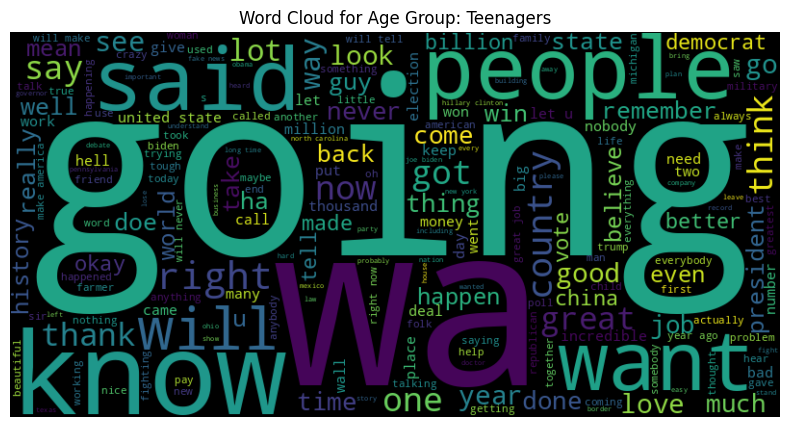

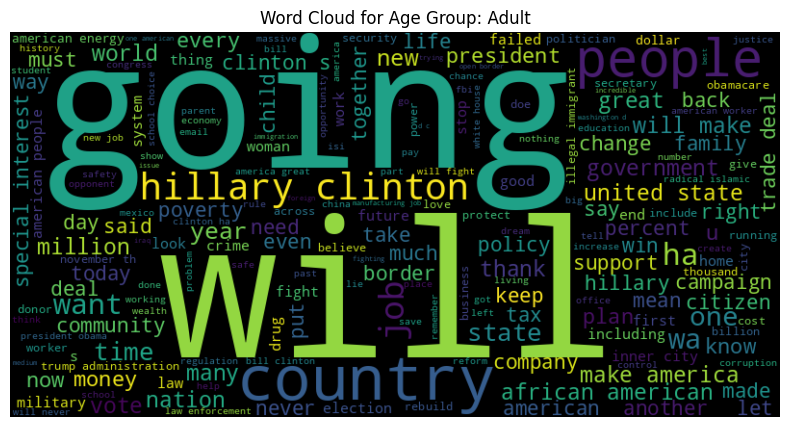

In [153]:
# To create a function to generate word clouds
def generate_word_cloud(age_group):
    # To filter the data for the specified age group
    age_group_data = data_kin[data_kin['AgeTag_Kin'] == age_group]

    # To combine all text in the age group into a single string
    text = ' '.join(age_group_data['Speech'])

    # To generate the word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='black').generate(text)

    # To display the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for Age Group: {age_group}')
    plt.axis('off')
    plt.show()

# To get unique age groups
age_groups = data_kin['AgeTag_Kin'].unique()

# To generate word clouds for each age group
for age_group in age_groups:
    generate_word_cloud(age_group)

**To show the Box plot**

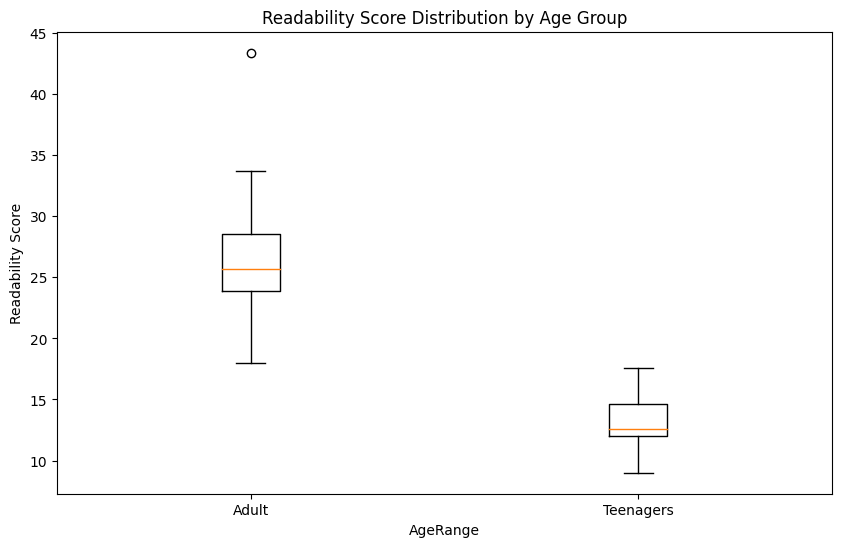

In [154]:
#to reate a dictionary to store the data frames
data_frames = {}

# To group the data by 'AgeTag' and store each group's data frame in the dictionary
grouped_data = data_kin.groupby('AgeTag_Kin')
for name, group in grouped_data:
    data_frames[name] = group['Flesch-Kincaid Grade Level'].values

# To create a list of data to plot
data_to_plot = [data for data in data_frames.values()]

# To create a box plot for each age group
plt.figure(figsize=(10, 6))
plt.boxplot(data_to_plot, labels=data_frames.keys())
plt.title('Readability Score Distribution by Age Group')
plt.xlabel('AgeRange')
plt.ylabel('Readability Score')
plt.show()

**To show plot of the Readin Age Tag**

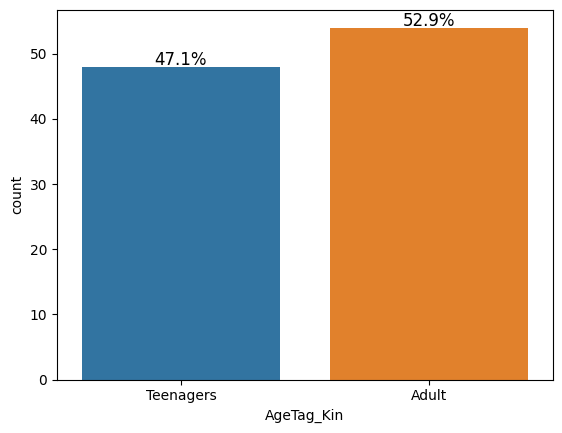

In [155]:
#To plot the disribution of the class label
def bar_plot(data, feature):
  #To create the countplot
  plot = sns.countplot(x = feature, data = data_kin)

  #To the length of the data
  total = len(data)


  for p in plot.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height() / total)
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        plot.annotate(percentage, (x, y), ha='center', va='center', size=12, xytext=(0, 5), textcoords='offset points')

plt.show()
bar_plot(data_kin, 'AgeTag_Kin')

**Applying the Term frequency- Inverse Document Frequency**

In [156]:
#using TfidfVectorizer to convert text data to numbers
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_kin = TfidfVectorizer(max_features = 10000)
#transform the text with TF-IDF
data_tfidf_kin = tfidf_kin.fit_transform(data_kin['Speech'])

#Feature shape
data_tfidf_kin = data_tfidf_kin.toarray()

**Selecting Features and Target**

In [157]:
#To select the features and target
X_kin = data_tfidf_kin
y_kin = data_kin.AgeTag_Kin

In [158]:
X_train_kin, X_test_kin, y_train_kin, y_test_kin = train_test_split(X_kin, y_kin, test_size=0.2, random_state=0,)

In [159]:
from sklearn.metrics._plot.confusion_matrix import confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix
# A function to print the classification report and get confusion matrix
def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))
    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(8, 5))
    sns.heatmap(cm, annot=True, fmt='.2f', xticklabels=['Teenagers', 'Adult'], yticklabels=['Teenagers', 'Adult'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

**Apply Random Forest**

In [160]:
from sklearn.ensemble import RandomForestClassifier
#To train the model
rf_kin = RandomForestClassifier(random_state = 0, n_jobs = -1)

rf_kin.fit(X_train_kin, y_train_kin)

RandomForestClassifier(n_jobs=-1, random_state=0)

              precision    recall  f1-score   support

       Adult       0.92      1.00      0.96        12
   Teenagers       1.00      0.89      0.94         9

    accuracy                           0.95        21
   macro avg       0.96      0.94      0.95        21
weighted avg       0.96      0.95      0.95        21



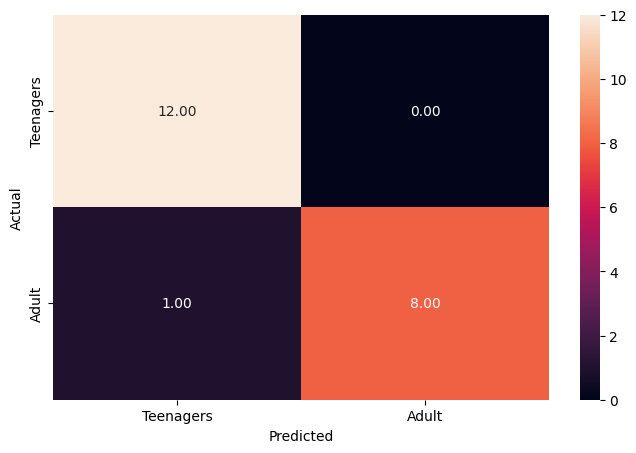

In [161]:
#make predictions
y_rf_kin = rf_kin.predict(X_test_kin)


#check the metrics
metrics_score(y_rf_kin, y_test_kin)

 **To apply Decision Tree Model**

In [162]:
# To create a Decision Tree classifier
dt_kin = DecisionTreeClassifier(random_state=0)

# Train the model
dt_kin.fit(X_train_kin, y_train_kin)

DecisionTreeClassifier(random_state=0)

              precision    recall  f1-score   support

       Adult       0.92      1.00      0.96        12
   Teenagers       1.00      0.89      0.94         9

    accuracy                           0.95        21
   macro avg       0.96      0.94      0.95        21
weighted avg       0.96      0.95      0.95        21



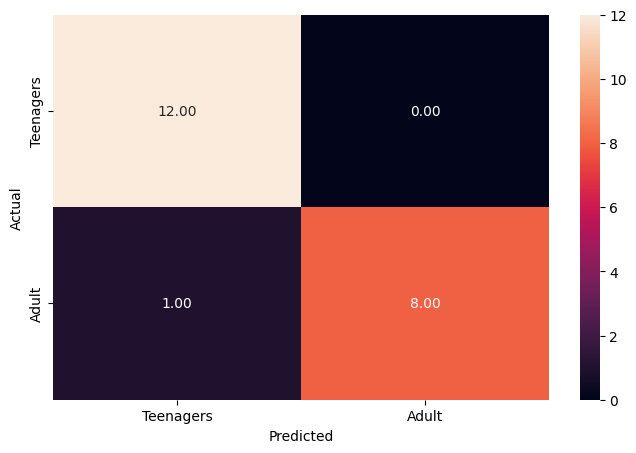

In [163]:
y_dt_kin = dt_kin.predict(X_test_kin)


#check the metrics
metrics_score(y_dt_kin, y_test_kin)

### **To show the features importance of the model**

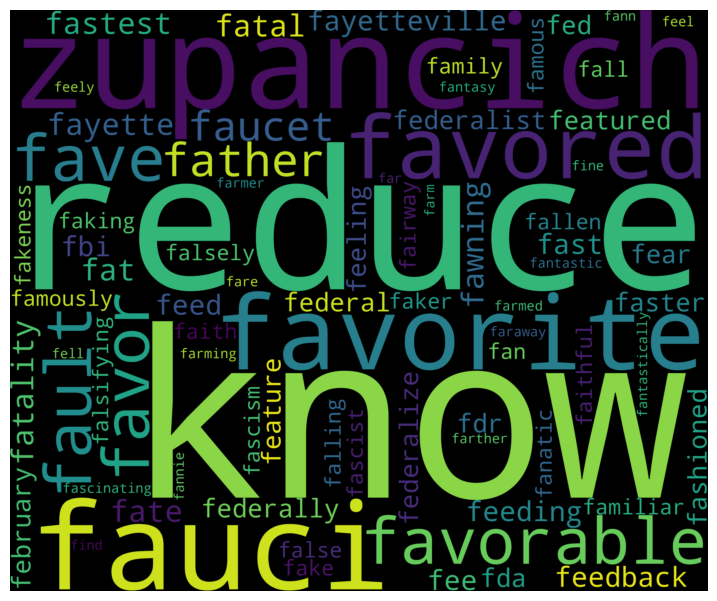

In [164]:
feature_names = tfidf_kin.get_feature_names_out()

get_top40_words(dt_kin,feature_names)

### **Cross Validation**

In [165]:
#To create an instance of the Kfold
kfold = KFold(n_splits=5, shuffle=True, random_state=0)


#To create an instance of the model
dt_kin = DecisionTreeClassifier(random_state=0)

#scores = cross_val_score(estimator=gb, X=X_train, y=y_train, cv=kfold, scoring='recall')

# Define the scoring metric as accuracy
#scoring = make_scorer(accuracy_score)

# Perform cross-validation using accuracy as the scoring metric
scores = cross_val_score(estimator=dt_kin, X=X_train_kin, y=y_train_kin, cv=kfold, scoring='accuracy')

# Print the scores
print(scores)

[0.88235294 0.875      0.6875     0.875      1.        ]
